# BIG DATA AND DATA MINING (PROJECT WORK)


## (1)  IMPORT LIBRARIES

In [1]:
import sqlite3 #import sql library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#create a connection to the database
conn = sqlite3.connect('accident_data.db')

In [3]:
#create database cursor
cur = conn.cursor()

## (2) DATA UNDERSTANDING

##### (i) Overview of the main database

In [4]:
Accident = cur.execute(f"PRAGMA table_info(accident)")
df_accident = pd.read_sql_query("SELECT * FROM accident", conn)

In [5]:
x= df_accident.accident_year.value_counts()
x

2017    129982
2018    122635
2019    117536
2020     91199
Name: accident_year, dtype: int64

Text(0.5, 1.0, 'Accidents over the years')

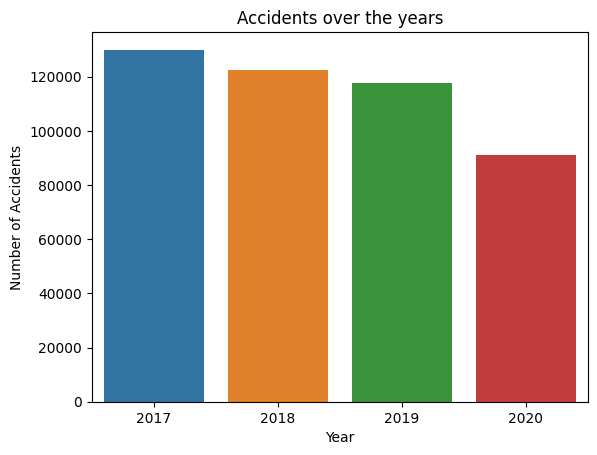

In [6]:
#Display bar chart of the accident database
sns.barplot(x= df_accident.accident_year.value_counts().index, y = df_accident.accident_year.value_counts())
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.title('Accidents over the years')

**Preceding year 2020, the number of accidents were high however it reduced by about 28 percent from 2017  to 2020**

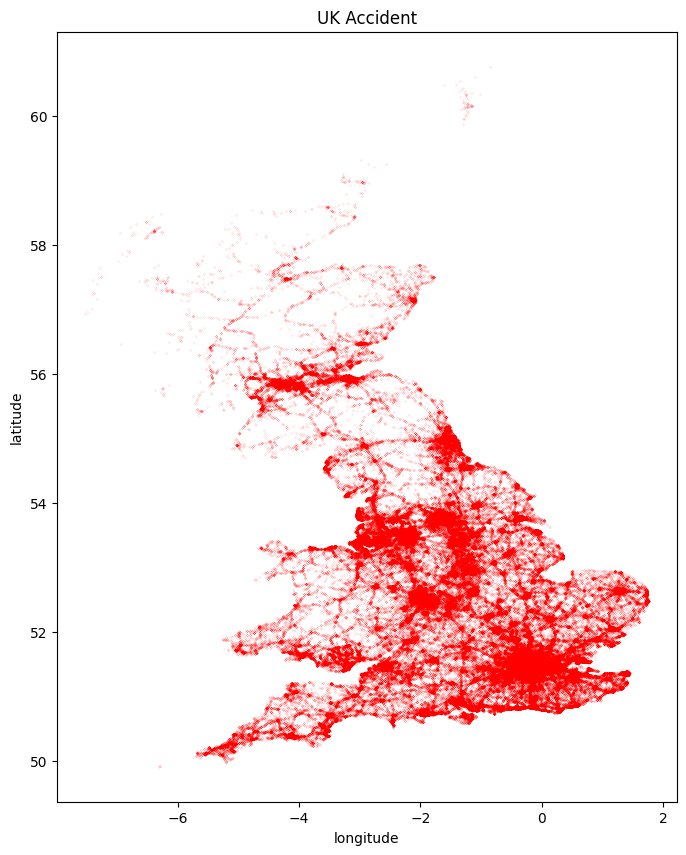

In [7]:
#Display a scatter plot of the accident database
plt.figure(figsize=(8, 10))
plt.scatter(x = df_accident['longitude'], y= df_accident['latitude'], s = 0.005, color = 'red')
plt.title('UK Accident')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

**The plot shows a concentration of accident in the south east of UK, West Midlands and part of the North West**

##### (ii) Get all table names

In [8]:
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
table_name = cur.fetchall()

In [9]:
table_name

[('accident',), ('casualty',), ('vehicle',), ('lsoa',)]

   **There are 4 tables in the dataset: Accident, Vehicle, Casualty, Lsoa**

##### (iii)Get all columns in each table

In [10]:
Accident = cur.execute(f"PRAGMA table_info(accident)")

In [11]:
Casualty = cur.execute(f"PRAGMA table_info(casualty)")

In [12]:
Vehicle = cur.execute(f"PRAGMA table_info(vehicle)")

In [13]:
Lsoa = cur.execute(f"PRAGMA table_info(lsoa)")

In [14]:
table_names = ['accident', 'vehicle', 'casualty', 'lsoa']

# Loop through each table
for table_name in table_names:
    # Retrieve the column names
    cur.execute(f"PRAGMA table_info({table_name})")
    columns = [column[1] for column in cur.fetchall()]
    
    #get number of rows
    cur.execute(f"SELECT COUNT(*) FROM {table_name};")
    row_count = cur.fetchone()[0]
    
    #get number of columns
    num_columns = len(columns)

    # Print the column names
    print(f"Row Count: {row_count}")
    print(f"Column Count: {num_columns}")
    print(f"Columns in {table_name}:")
    print(columns)
    print()

Row Count: 461352
Column Count: 36
Columns in accident:
['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']

Row Count: 849091
Column Count: 28
Columns in vehicle:
['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicl

**There are 461352 rows and 36 columns in accident table**

**There are 849091 rows and 28 columns in vehicle table** 

**There are 600332 rows and 19 columns in casualty table**

**There are 34378 rows and 7 columns in lsoa table**

##  (3) GET DATA FOR YEAR 2020

#####  Load Year 2020 data from database into DataFrame

In [15]:
#Read data from sql database and put each in pandas
df_accident_2020 = pd.read_sql_query("SELECT * FROM accident WHERE accident_year=2020", conn)
df_casualty_2020 = pd.read_sql_query("SELECT * FROM casualty WHERE accident_year=2020", conn)
df_vehicle_2020 = pd.read_sql_query("SELECT * FROM vehicle WHERE accident_year=2020", conn)
df_lsoa_2020 = pd.read_sql_query("SELECT * FROM lsoa", conn)

## (4) DATA PREPARATION

#### Accident table

##### (i) Checking for missing values

In [16]:
# display percentage of null values in accident df
df_accident_2020.isnull().sum()
df_accident_2020.isnull().sum().sort_values(ascending=False)*100/len(df_accident_2020)

location_easting_osgr                          0.015351
location_northing_osgr                         0.015351
longitude                                      0.015351
latitude                                       0.015351
accident_index                                 0.000000
weather_conditions                             0.000000
junction_control                               0.000000
second_road_class                              0.000000
second_road_number                             0.000000
pedestrian_crossing_human_control              0.000000
pedestrian_crossing_physical_facilities        0.000000
light_conditions                               0.000000
special_conditions_at_site                     0.000000
road_surface_conditions                        0.000000
speed_limit                                    0.000000
carriageway_hazards                            0.000000
urban_or_rural_area                            0.000000
did_police_officer_attend_scene_of_accident    0

**Of all the columns in the accident2020, location_easting_osgr, location_northing_osgr, longitude and latitude have null values with approximately 0.02 percent**

**Columns needed for further analysis would be cleaned before analysis**

##### (ii) Checking for statistical summary of accident table

In [17]:
#display statistical summary of accident df
df_accident_2020.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count        91199.0           91185.000000            9.118500e+04   
mean          2020.0          456487.876416            2.737645e+05   
std              0.0           93512.711807            1.473516e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392890.000000            1.745690e+05   
50%           2020.0          465545.000000            2.085990e+05   
75%           2020.0          530168.000000            3.783660e+05   
max           2020.0          655138.000000            1.184351e+06   

          longitude      latitude  police_force  accident_severity  \
count  91185.000000  91185.000000  91199.000000       91199.000000   
mean      -1.189258     52.351073     27.488043           2.768232   
std        1.367786      1.327573     24.548964           0.456682   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107789     51.457237      4.000000           3.000000   
50%       -1.046912     51.763385     22.000000           3.000000   
75%       -0.125238     53.297386     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   

       number_of_vehicles  number_of_casualties   day_of_week  ...  \
count        91199.000000          91199.000000  91199.000000  ...   
mean             1.835272              1.267382      4.121558  ...   
std              0.677272              0.681473      1.932200  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              1.000000      6.000000  ...   
max             13.000000             41.000000      7.000000  ...   

       pedestrian_crossing_human_control  \
count                       91199.000000   
mean                            0.352975   
std                             1.698116   
min                            -1.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             9.000000   

       pedestrian_crossing_physical_facilities  light_conditions  \
count                             91199.000000      91199.000000   
mean                                  1.185309          2.065308   
std                                   2.445924          1.747690   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   

       weather_conditions  road_surface_conditions  \
count        91199.000000             91199.000000   
mean             1.702047                 1.391583   
std              1.845786                 0.925690   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 9.000000   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
count                91199.000000         91199.000000         91199.000000   
mean                     0.244740             0.180594             1.323205   
std                      1.318554             1.149791             0.468031   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   
50%                      0.000000             0.000000             1.000000   
75%                      0.000000             0.000000 

**There are negative numbers in some of the columns in accident 2020. Columns that are not needed will be diregarded however columns that will be useful for analysis will be cleaned prior to analysis**

**For accident severity, the median and 25th percentile are 3 which indicates that more than three quarter of the accidents were not fatal**

**The average of people involved in accident is 1**

**The average number of vehicles involved in accident is 2 which show that there were no multiple accidents**

##### (iii) Checking the plots of numerical columns

<Figure size 640x480 with 0 Axes>

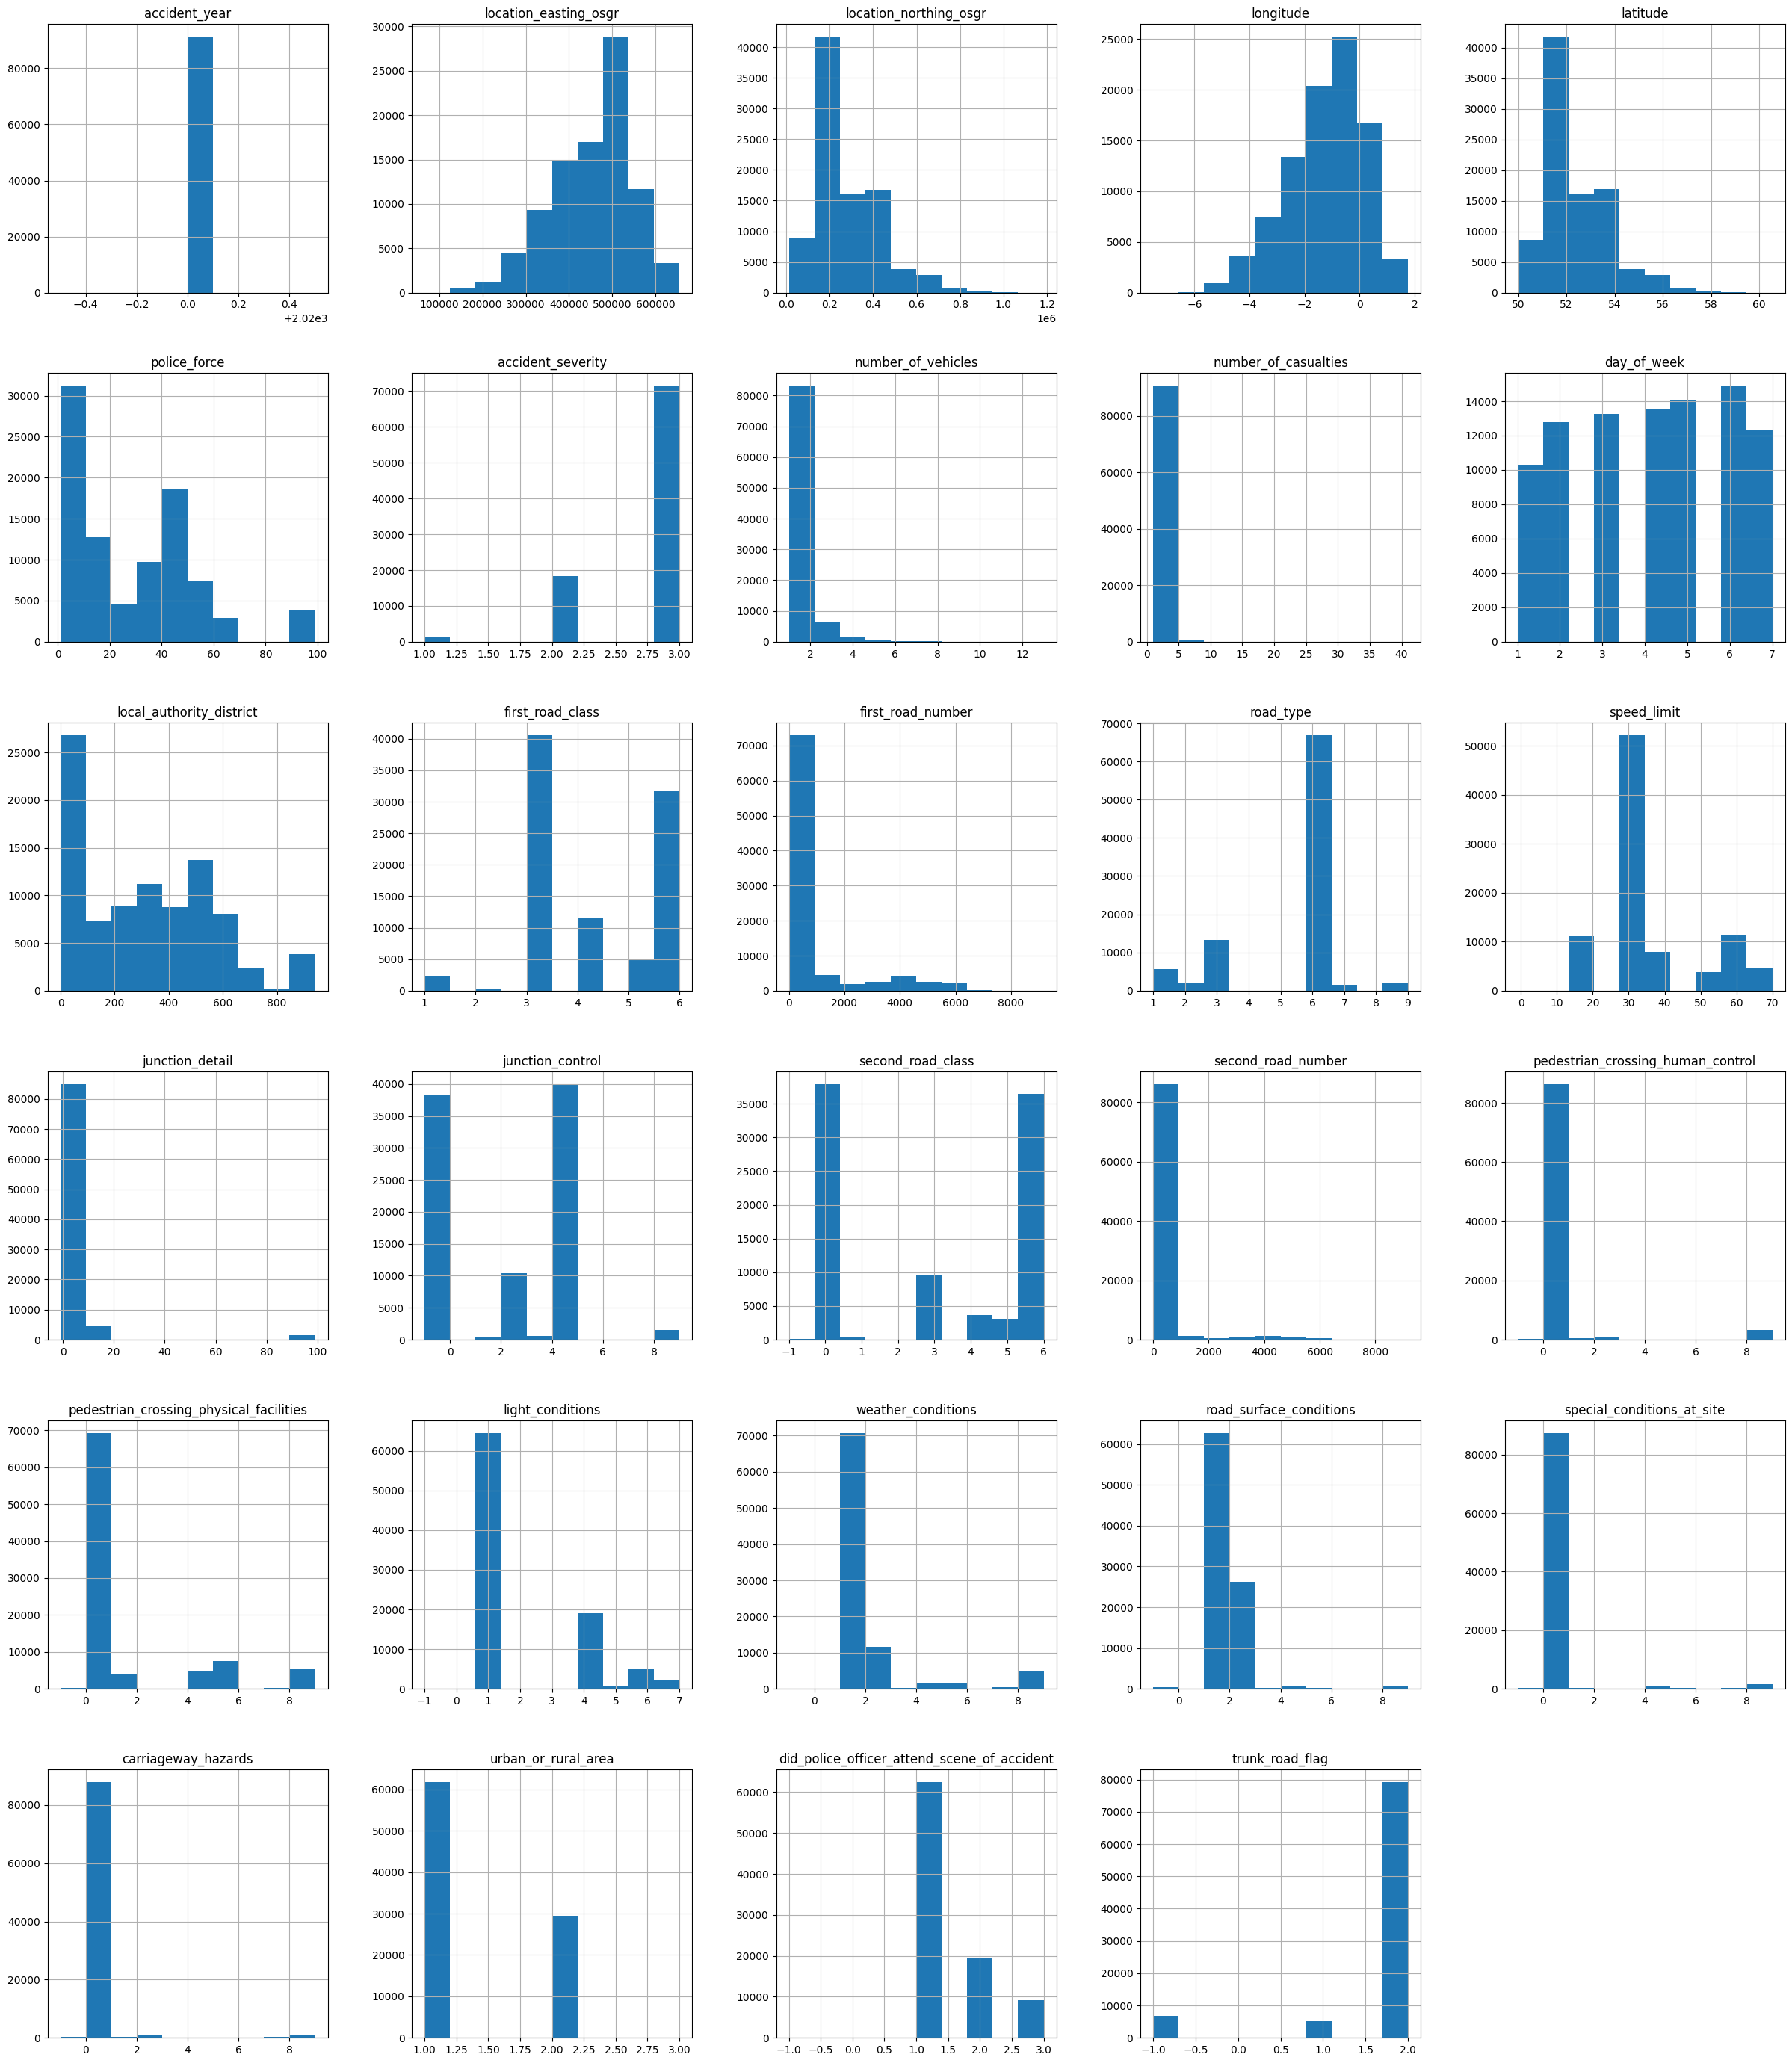

In [18]:
#plot histogram of each numerical column
plt.figure(dpi = 100)
df_accident_2020.hist(figsize = (30, 35))
plt.grid(False)
plt.show()

**From Police force, it is deduced that London, Cumbria, Lancashire, Merseyside, Greater Manchester, Cheshire and Northumbria contributed greatly to the number of accidents in 2020 while Wales, Gwent, South Wales and Dyfed Ponys had few numbers**

**Most accidents were not fatal as 3 (slight accident) appeared most**

**Most accidents involved at most 2 vehicles**

**The maximum range for number of casualty was 0 to 5**

**A greater number of the accidents occured in January and February while the least occurred in April**

**Most speed limits of accidents were 30mph while the least was 50mph**

**Accident occurred most on single carriageways i.e carriageways separated by line marking and not physical barriers, while it occurred least on one way street and slip roads**

**Most accidents happened in the daylight**

**A greater rate of accidents occurred when the weather was fine and without high winds**


In [19]:
#get the frequency of each unique values in police force in decreasing order and show first 10
d = df_accident_2020["police_force"].value_counts(ascending=False)
d.head(10)

1     20906
20     3933
99     3836
46     3405
47     3107
44     3016
43     2767
13     2764
50     2616
42     2536
Name: police_force, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Accidents by Police Force')

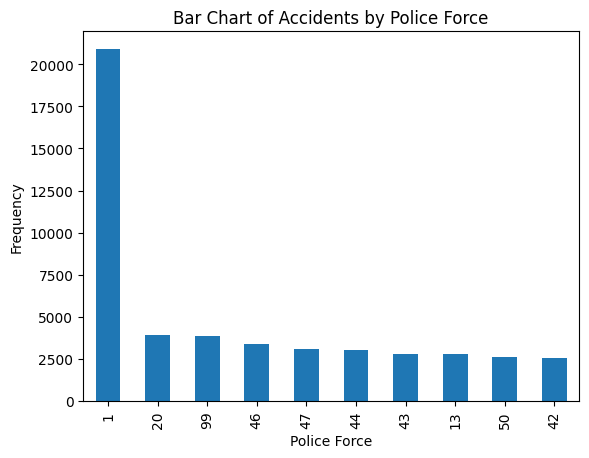

In [20]:
#plot the bar chart of the first 10
d[:10].plot(kind= 'bar')
plt.xlabel('Police Force')
plt.ylabel('Frequency')
plt.title('Bar Chart of Accidents by Police Force')

**Evidently, London has the highest number of accidents, followed by West Midlands**

#### Casualty table

##### (i) Checking missing values in casualty df

In [21]:
#get the percentage null values of the casualty df
df_casualty_2020.isnull().sum().sort_values(ascending=False)*100/len(df_casualty_2020)

casualty_index                        0.0
casualty_severity                     0.0
casualty_home_area_type               0.0
casualty_type                         0.0
pedestrian_road_maintenance_worker    0.0
bus_or_coach_passenger                0.0
car_passenger                         0.0
pedestrian_movement                   0.0
pedestrian_location                   0.0
age_band_of_casualty                  0.0
accident_index                        0.0
age_of_casualty                       0.0
sex_of_casualty                       0.0
casualty_class                        0.0
casualty_reference                    0.0
vehicle_reference                     0.0
accident_reference                    0.0
accident_year                         0.0
casualty_imd_decile                   0.0
dtype: float64

**There are no null values in casualty df**

##### (ii) Checking statistical summary of casualty df

In [22]:
#get the statistical summary of the casualty df
df_casualty_2020.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference  \
count   115584.000000       115584.0      115584.000000       115584.000000   
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count   115584.000000    115584.000000    115584.000000         115584.000000   
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      115584.000000        115584.000000        115584.000000   
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count  115584.000000           115584.000000   
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       115584.000000  115584.000000   
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

**some columns such as sex of casualty, age of casualty, age band of casualty contain negative numbers**

##### (iii) Checking the plots of numrical colums

<Figure size 640x480 with 0 Axes>

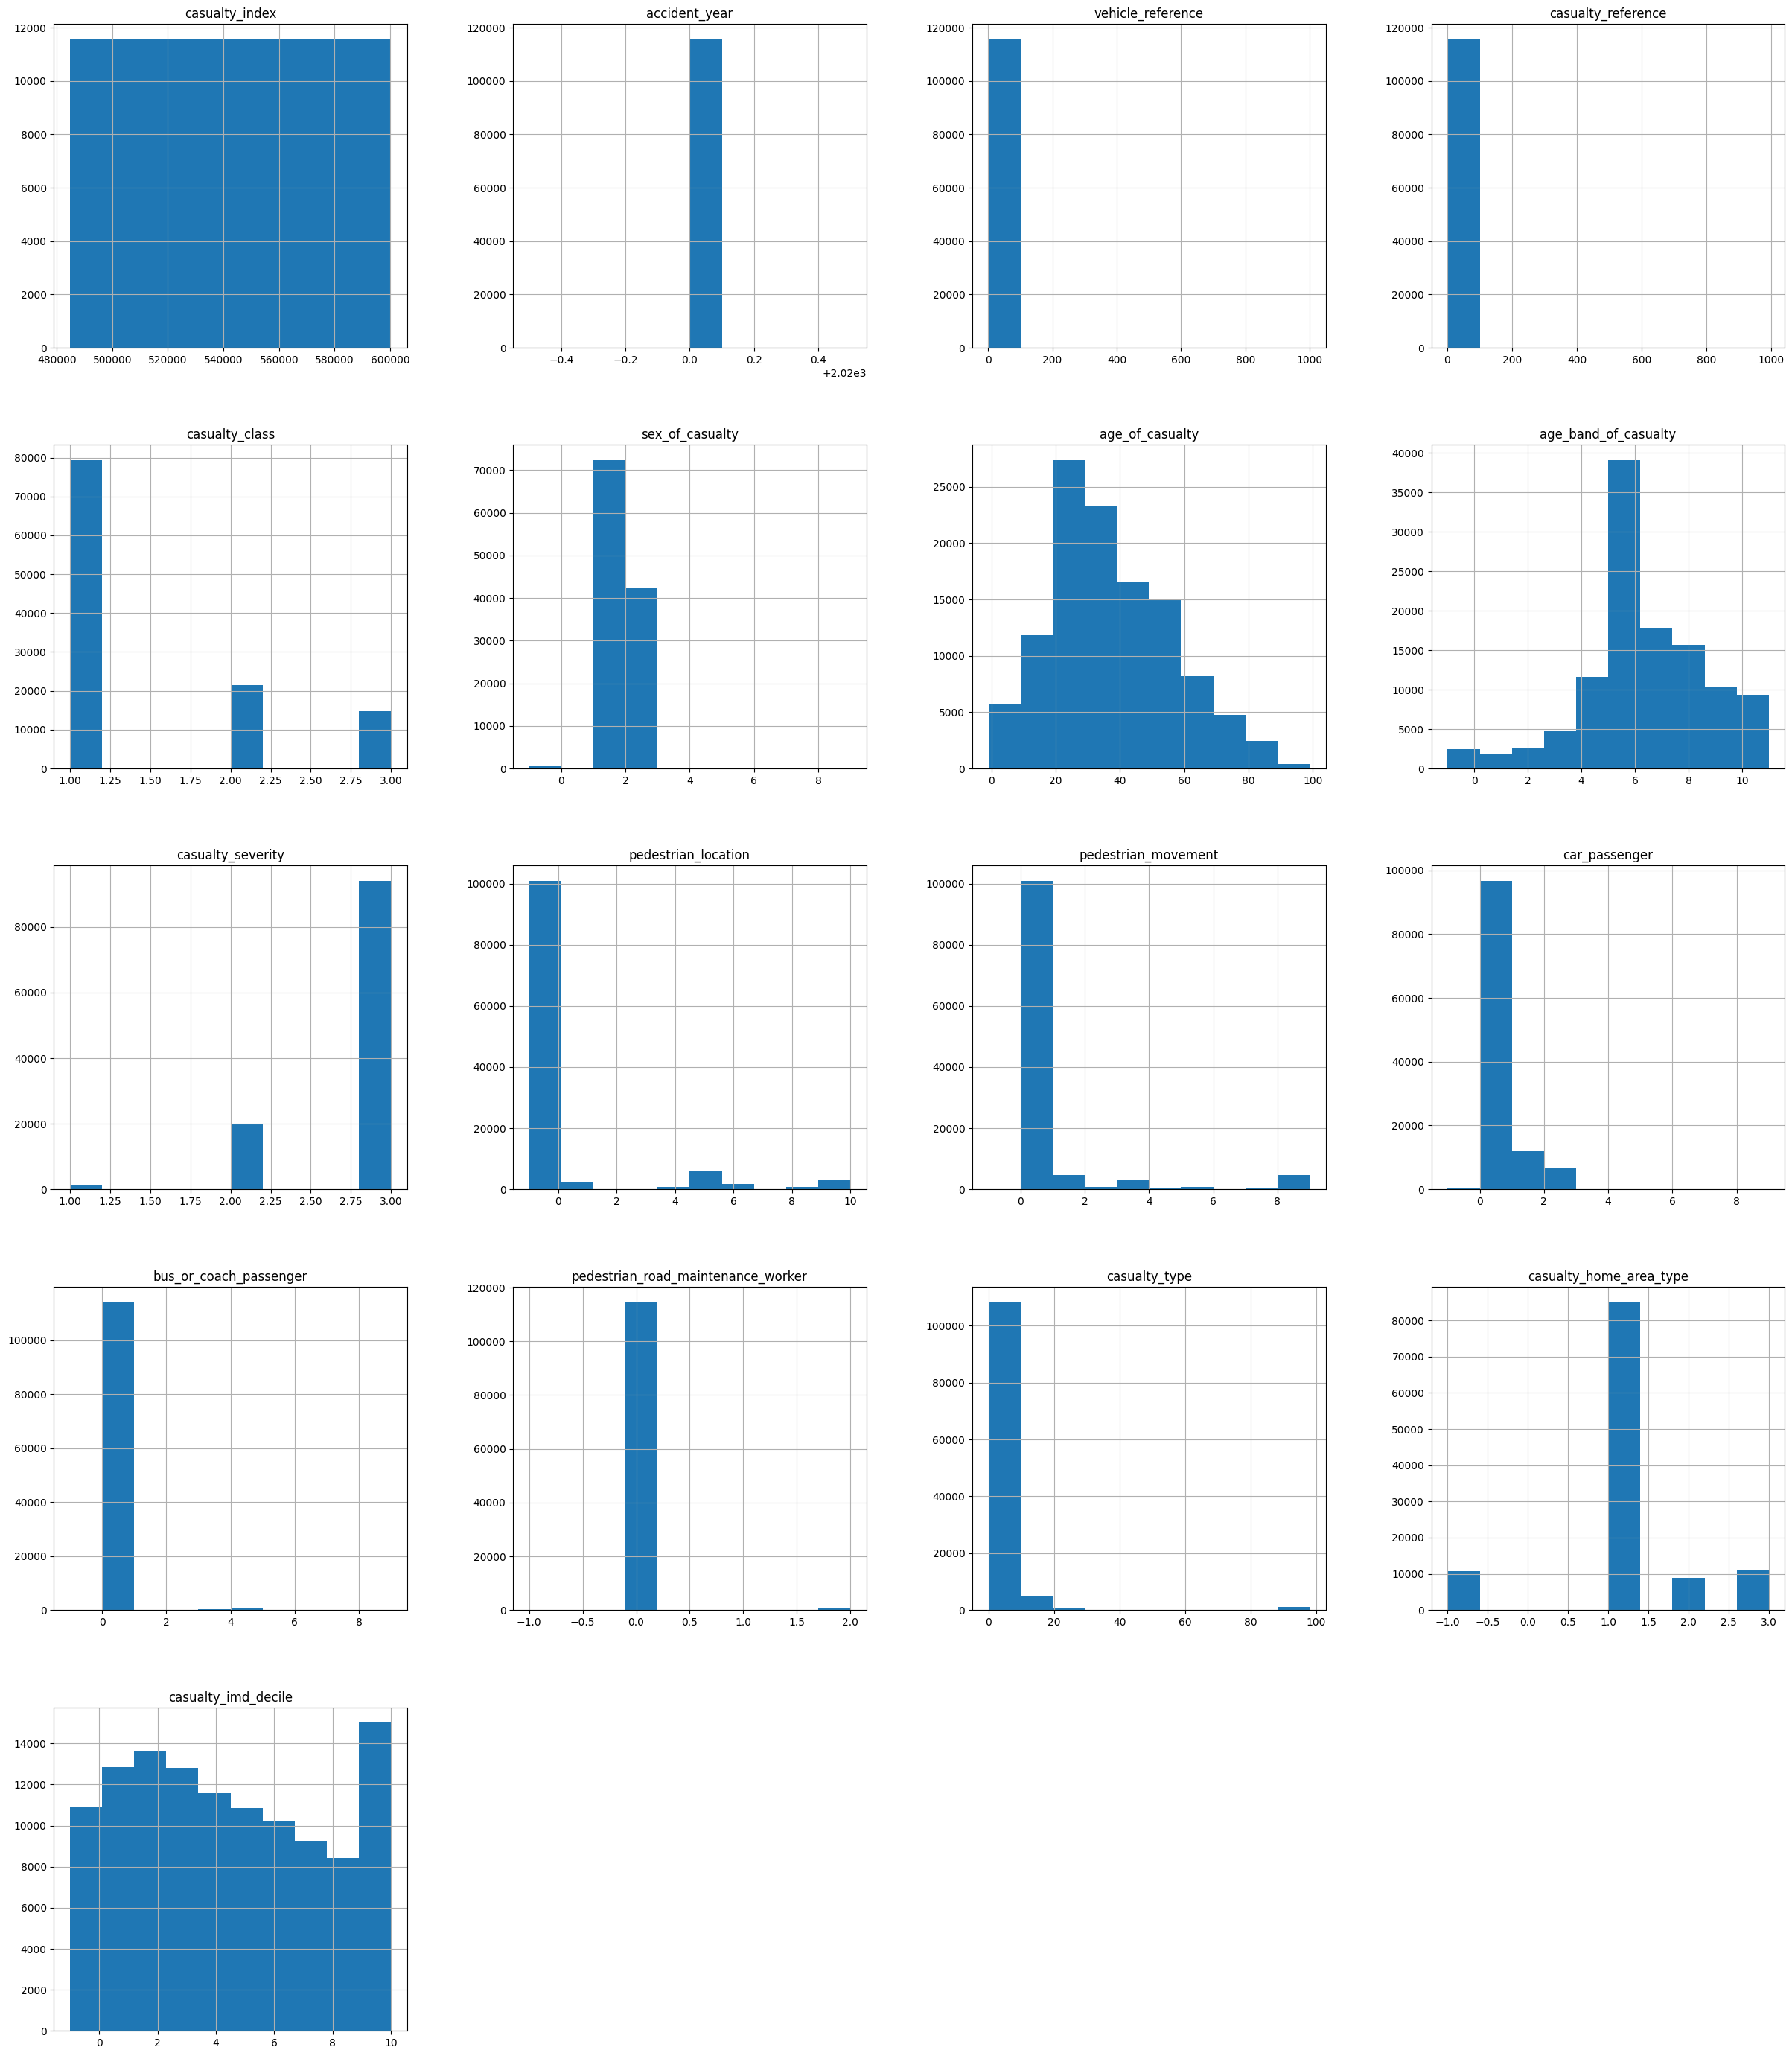

In [23]:
#plot the histogram of the numerical columns in the casualty df
plt.figure(dpi = 100)
df_casualty_2020.hist(figsize = (30, 35))
plt.show()

**From the casualty class, it is observed that most casualties were drivers while the least were pedestrians**

**Sex of casualty has negative numbers which is relatively small and may not likely impact on the whole, hence males were more involved in accidents than thier female counterparts**

**The average age of most casualties is 33 years**

### Vehicle table

##### (i) Checking percentage of missing values in vehicle df

In [24]:
#get the percentage null values of the vehicle df
df_vehicle_2020.isnull().sum().sort_values(ascending=False)*100/len(df_vehicle_2020)

vehicle_index                       0.0
accident_index                      0.0
driver_imd_decile                   0.0
generic_make_model                  0.0
age_of_vehicle                      0.0
propulsion_code                     0.0
engine_capacity_cc                  0.0
age_band_of_driver                  0.0
age_of_driver                       0.0
sex_of_driver                       0.0
journey_purpose_of_driver           0.0
vehicle_left_hand_drive             0.0
first_point_of_impact               0.0
hit_object_off_carriageway          0.0
vehicle_leaving_carriageway         0.0
hit_object_in_carriageway           0.0
skidding_and_overturning            0.0
junction_location                   0.0
vehicle_location_restricted_lane    0.0
vehicle_direction_to                0.0
vehicle_direction_from              0.0
vehicle_manoeuvre                   0.0
towing_and_articulation             0.0
vehicle_type                        0.0
vehicle_reference                   0.0


**There are no null values in vehicle df**

##### (ii) Checking the statistics of vehicle df

In [25]:
#get the statistical summary of the df
df_vehicle_2020.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type  \
count   167375.00000       167375.0      167375.000000  167375.000000   
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count            167375.000000      167375.000000           167375.000000   
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane  \
count         167375.000000                     167375.000000   
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  ...  vehicle_left_hand_drive  \
count      167375.000000  ...            167375.000000   
mean            2.598303  ...                 1.448962   
std             3.285627  ...                 1.854349   
min            -1.000000  ...                -1.000000   
25%             0.000000  ...                 1.000000   
50%             1.000000  ...                 1.000000   
75%             6.000000  ...                 1.000000   
max             9.000000  ...                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
count              167375.000000  167375.000000  167375.000000   
mean                    4.717066       1.480347      34.509658   
std                     1.914971       0.693344      20.797517   
min                    -1.000000      -1.000000      -1.000000   
25%                     4.000000       1.000000      22.000000   
50%                     6.000000       1.000000      34.000000   
75%                     6.000000       2.000000      49.000000   
max                     6.000000       3.000000     100.000000   

       age_band_of_driver  engine_capacity_cc  propulsion_code  \
count       167375.000000       167375.000000    167375.000000   
mean             5.780272         1332.294554         0.970121   
std              3.185713         1543.509942         1.585310   
min             -1.000000           -1.000000        -1.000000   
25%              5.000000           -1.000000        -1.000000   
50%              6.000000         1368.000000         1.000000   
75%              8.000000         1910.000000         2.000000   
max             11.000000        17696.000000        12.000000   

       age_of_vehicle  driver_imd_decile  driver_home_area_type  
count   167375.000000      167375.000000          167375.000000  
mean         5.820600           3.904143               0.871253  
std          6.331929           3.445329               1.072733  
min         -1.000000          -1.000000              -1.000000  
25%         -1.000000     

##### (iii) Checking the plots of numerical columns

<Figure size 640x480 with 0 Axes>

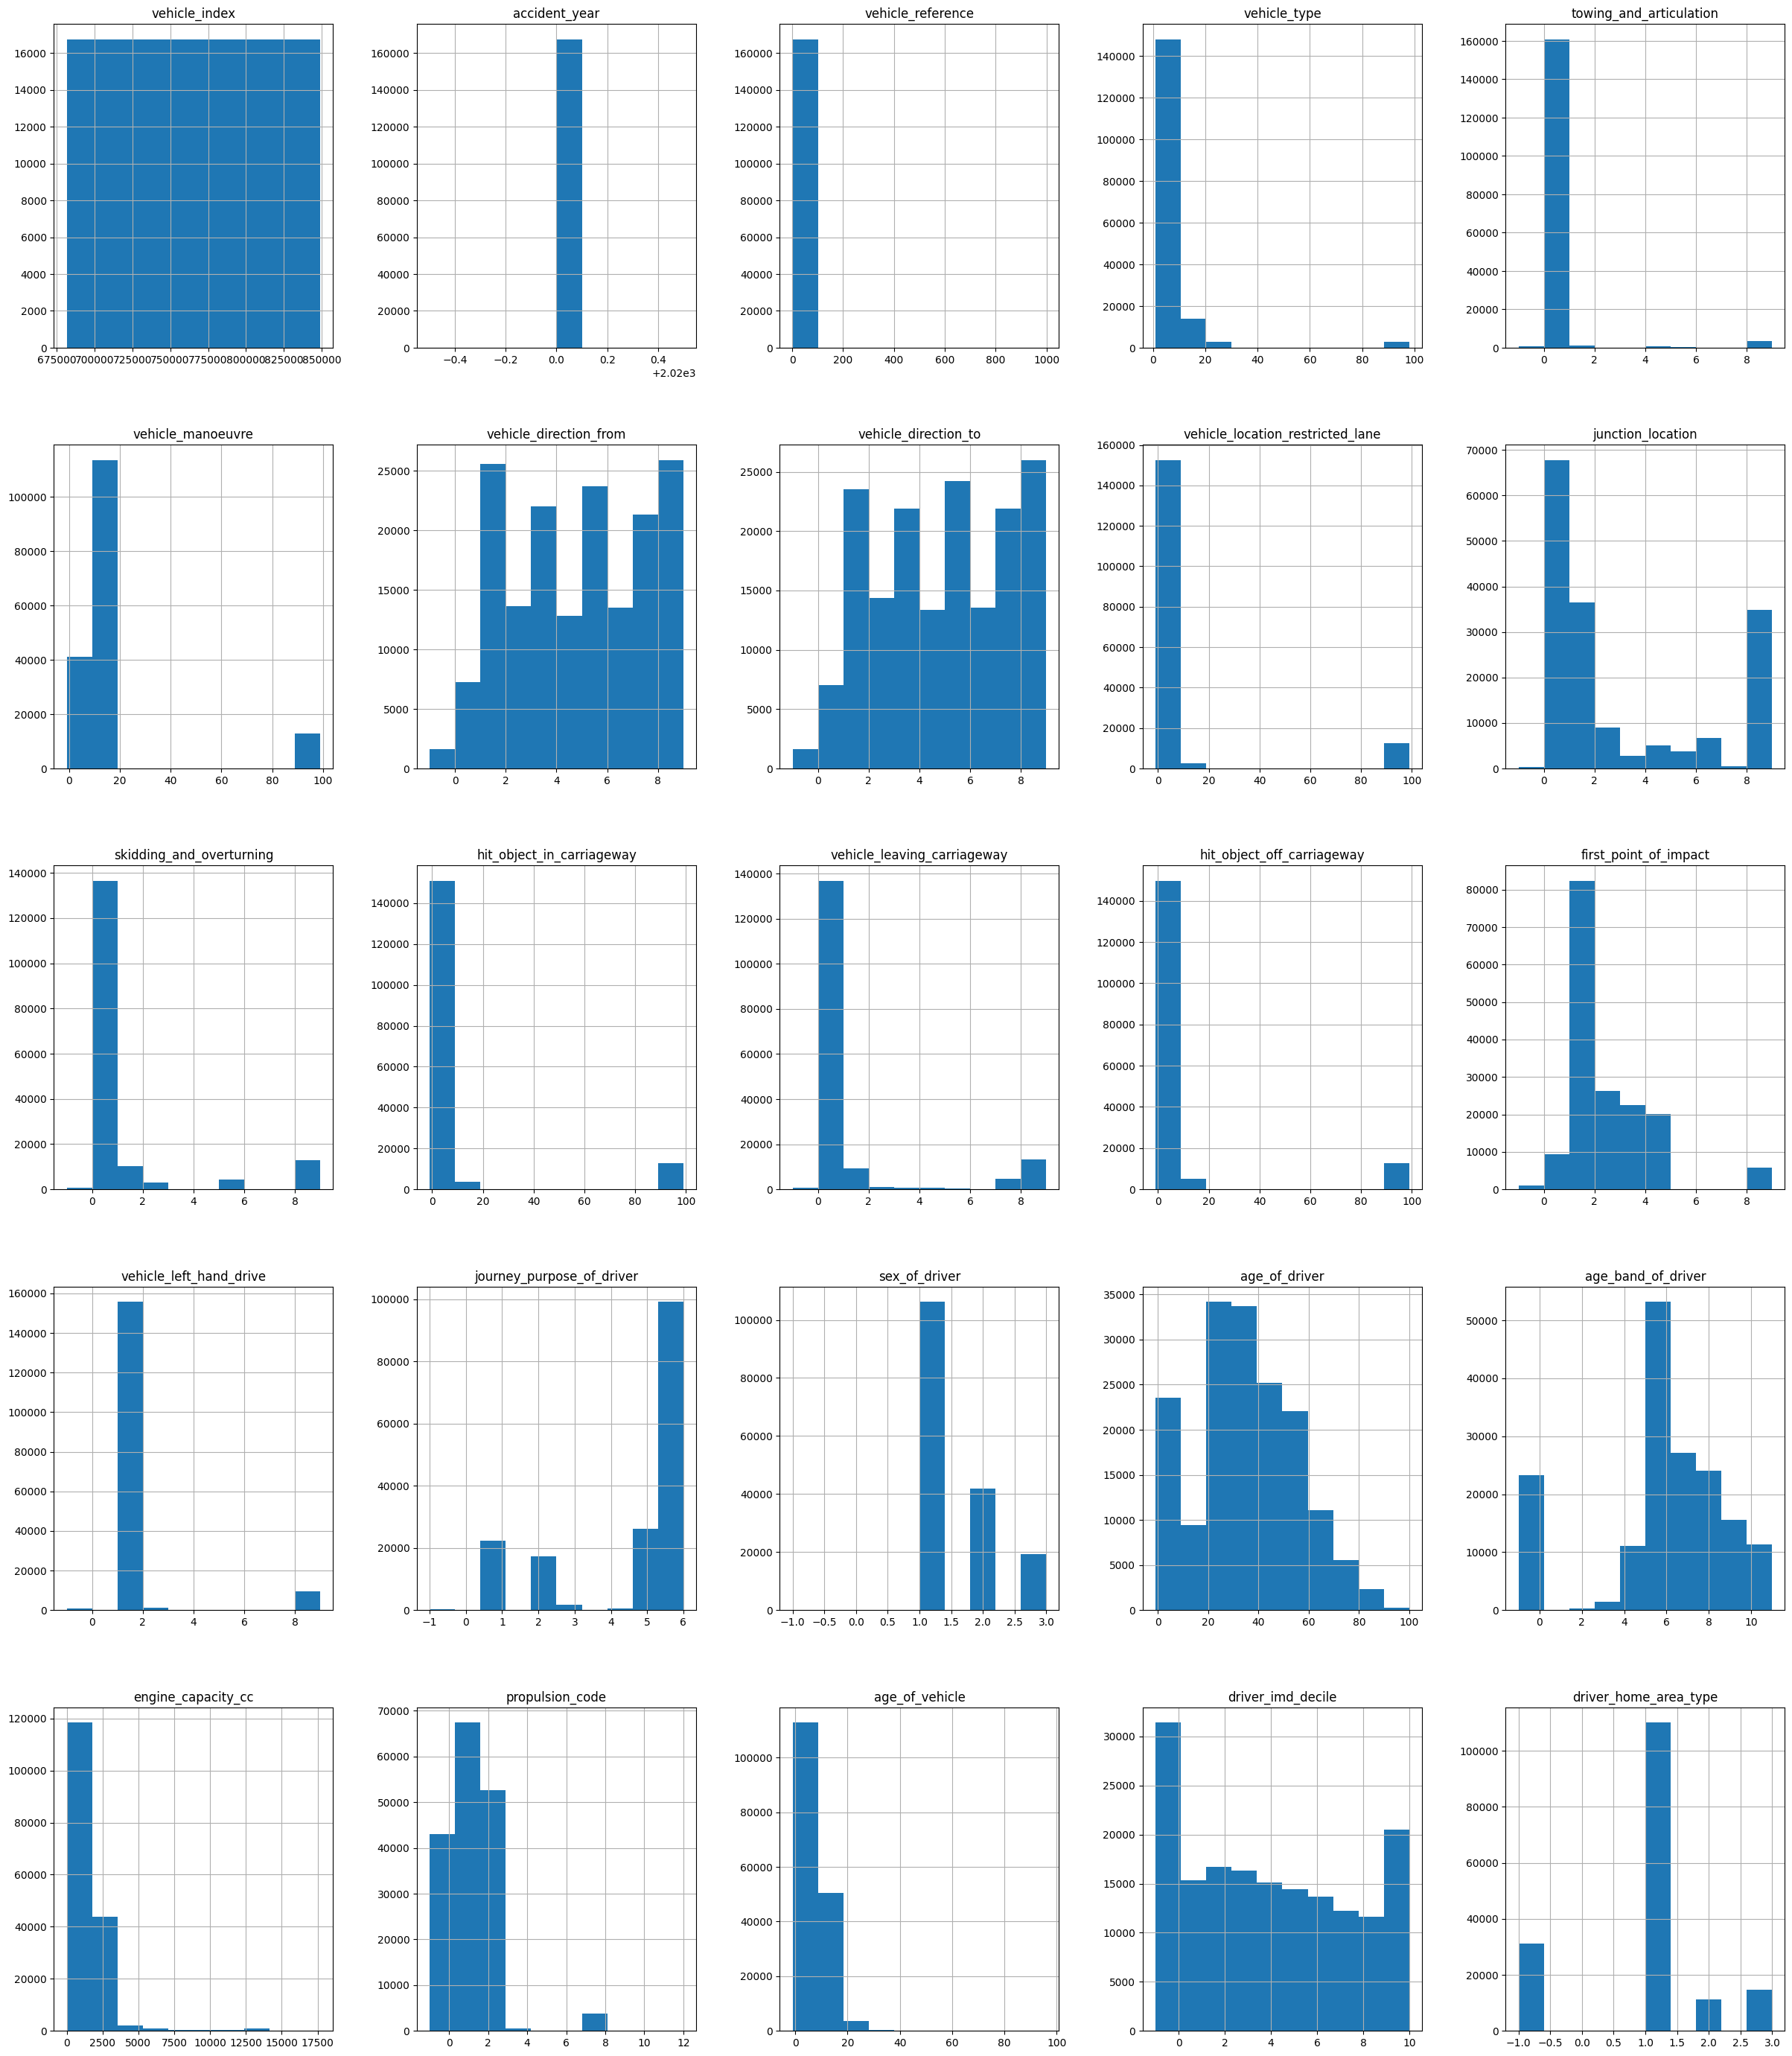

In [26]:
# display histogram of the numerical values in vehicle df
plt.figure(dpi = 100)
df_vehicle_2020.hist(figsize = (30, 35))
plt.show()

**Most vehicle type is between 0 to 9**

## (3) Data Preparation

##### (i) Converting Datetime column

In [27]:
#convert value in date to datetime and get the date before month
df_accident_2020['date'] = pd.to_datetime(df_accident_2020['date'], dayfirst = True, format = '%d/%m/%Y')

In [28]:
#get day of week corresponding to dates
df_accident_2020['day_of_week'] = df_accident_2020['date'].dt.day_name()

#### To get the names of the days of the week

In [29]:
df_accident_2020['day_of_week']

0          Tuesday
1           Monday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
91194    Wednesday
91195       Friday
91196    Wednesday
91197      Tuesday
91198      Tuesday
Name: day_of_week, Length: 91199, dtype: object

##### (ii) Replacing negative ones in Accident table

**Negative numbers may be regarded as missing values in order for pandas to treat them.
Statistical imputation technique in which missing values are replaced with mean, median, mode or other central tendency measure will be used to replace negative ones below 10 percent.
However, for age of driver where it is stated on Stat20 that if it is not possible to make a reasonable estimate, it should be left blank and not to enter 000, 099 or 999 or 'not known', this cannot be replaced with nan. 
Columns with 30 percent negative will be treated under outlier (age of driver,  age of vehicle, junction control)
For the purpose of this analysis, negative numbers will be treated where necessary however, negative numbers in location/cardinal points are indicators of geographic location, and as such will not be replaced**

In [30]:
lcmean = df_accident_2020['light_conditions'].median()
df_accident_2020['light_conditions'].replace(-1, lcmean,inplace=True)

wcmean = df_accident_2020['weather_conditions'].median()
df_accident_2020['weather_conditions'].replace(-1, wcmean,inplace=True)

slmean = df_accident_2020['speed_limit'].median()
df_accident_2020['speed_limit'].replace(-1, slmean,inplace=True)


#df_accident_2020['junction_control'].replace(-1, "unknown",inplace=True) #has 38,298 negative one 33 percent

rscmean = df_accident_2020['road_surface_conditions'].median()
df_accident_2020['road_surface_conditions'].replace(-1, rscmean,inplace=True) 

pchcmean = df_accident_2020['pedestrian_crossing_human_control'].median()
df_accident_2020['pedestrian_crossing_human_control'].replace(-1, pchcmean,inplace=True)

pcpfmean = df_accident_2020['pedestrian_crossing_human_control'].median()
df_accident_2020['pedestrian_crossing_physical_facilities'].replace(-1, pcpfmean, inplace=True)

chmean = df_accident_2020['carriageway_hazards'].median()
df_accident_2020['carriageway_hazards'].replace(-1, chmean, inplace=True)

policemean = df_accident_2020['did_police_officer_attend_scene_of_accident'].median()
df_accident_2020['did_police_officer_attend_scene_of_accident'].replace(-1, policemean, inplace=True)

df_accident_2020['trunk_road_flag'].replace(-1, "unknown", inplace=True) #has 6,714 negative ones



#### (iii) Replacing negative ones in Casualty table

In [31]:
socmean = df_casualty_2020['sex_of_casualty'].median()
df_casualty_2020['sex_of_casualty'].replace(-1, socmean, inplace=True)

abcmean = df_casualty_2020['age_band_of_casualty'].median()
df_casualty_2020['age_band_of_casualty'].replace(-1, abcmean, inplace=True)

plmean = df_casualty_2020['pedestrian_location'].median()
df_casualty_2020['pedestrian_location'].replace(-1, plmean, inplace=True)

pmmean = df_casualty_2020['pedestrian_movement'].median()
df_casualty_2020['pedestrian_movement'].replace(-1, pmmean, inplace=True)

cpmean = df_casualty_2020['car_passenger'].median()
df_casualty_2020['car_passenger'].replace(-1, cpmean, inplace=True)

bcpmean = df_casualty_2020['bus_or_coach_passenger'].median()
df_casualty_2020['bus_or_coach_passenger'].replace(-1, bcpmean, inplace=True)

chatmean = df_casualty_2020['casualty_home_area_type'].median()
df_casualty_2020['casualty_home_area_type'].replace(-1, chatmean, inplace=True)

prmwmean = df_casualty_2020['pedestrian_road_maintenance_worker'].median()
df_casualty_2020['pedestrian_road_maintenance_worker'].replace(-1, prmwmean, inplace=True)

cidmean = df_casualty_2020['casualty_imd_decile'].median()
df_casualty_2020['casualty_imd_decile'].replace(-1, cidmean, inplace=True)

#### (iv) Replacing negative ones in vehicle table

In [32]:
#df_vehicle_2020['age_of_vehicle'].replace(-1, "unknown", inplace=True)         43,072 negative numbers
#df_vehicle_2020['engine_capacity_cc'].replace(-1, "unknown", inplace=True)     43603
#df_vehicle_2020['age_of_driver'].replace(-1, "unknown")

sodmean = df_vehicle_2020['sex_of_driver'].median()
df_vehicle_2020['sex_of_driver'].replace(-1, sodmean, inplace=True)

#df_vehicle_2020['driver_home_area_type'].replace(-1, "unknown", inplace=True)
#df_vehicle_2020['driver_imd_decile'].replace(-1, "unknown", inplace=True)
#df_vehicle_2020['propulsion_code'].replace(-1, "unknown", inplace=True)

## EXERCISE 1: Are there significant hours of the day, and days of the week, on which accidents occur?

#### To get the significant hours of day on which accidents occur

In [33]:
def time_range(time):
    if time >=5 and time < 9:
        return "morning rush (5 - 9)"
    elif time >=9 and time < 15:
        return "office hours (9 - 15)"
    elif time >= 15 and time < 19:
        return "afternoon rush (15 - 19)"
    elif time >= 19 and time < 23:
        return "evening (19 - 23)"
    else:
        return "night (23 - 5)"
    
df_accident_2020['time']

0        09:00
1        13:55
2        01:25
3        01:50
4        02:25
         ...  
91194    14:30
91195    15:05
91196    12:42
91197    14:00
91198    13:50
Name: time, Length: 91199, dtype: object

In [34]:
# retrieve info for accident 2020, count num of acc at diff times and order in desc order

query = """
SELECT time, COUNT(accident_index) AS number_of_accidents
FROM accident
WHERE accident_year = 2020
GROUP BY time
ORDER BY number_of_accidents DESC
"""

In [35]:
#read sql query into pd
df_acc_time = pd.read_sql(query, conn)

In [36]:
#display the pd
df_acc_time

time  number_of_accidents
0     17:00                  862
1     16:00                  785
2     15:00                  774
3     17:30                  746
4     18:00                  739
...     ...                  ...
1433  04:58                    1
1434  04:39                    1
1435  04:33                    1
1436  04:31                    1
1437  03:36                    1

[1438 rows x 2 columns]

In [37]:
# display the top 20 rows
signif_acc_time = df_acc_time.head(20)
signif_acc_time

time  number_of_accidents
0   17:00                  862
1   16:00                  785
2   15:00                  774
3   17:30                  746
4   18:00                  739
5   14:00                  699
6   16:30                  697
7   15:30                  697
8   18:30                  629
9   13:00                  605
10  19:00                  587
11  12:00                  575
12  13:30                  565
13  14:30                  559
14  08:30                  522
15  12:30                  519
16  11:00                  475
17  09:00                  474
18  08:00                  455
19  11:30                  453

**Most accidents occurred late afternoon/evening**

In [38]:
#import library
import seaborn as sns

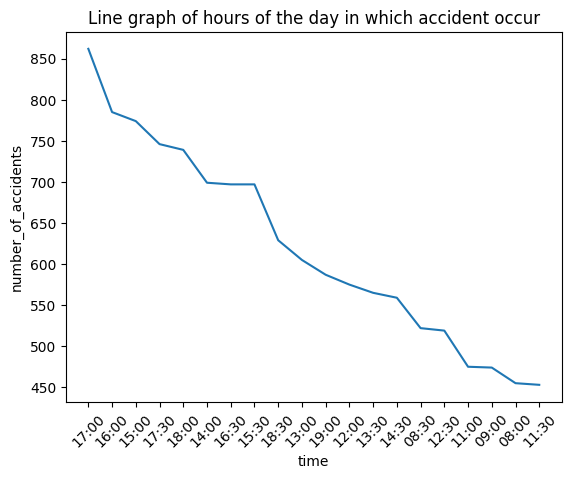

In [39]:
#plot line of hours and number of incidents
sns.lineplot(data = signif_acc_time, x = "time", y = "number_of_accidents")
plt.title('Line graph of hours of the day in which accident occur')
plt.xticks(rotation = 45);

**The line graph shows a descending trend with the peak at 17:00 GMT having 850 number of accidents, followed by 16:00 GMT**

Text(0, 0.5, 'Number of accidents')

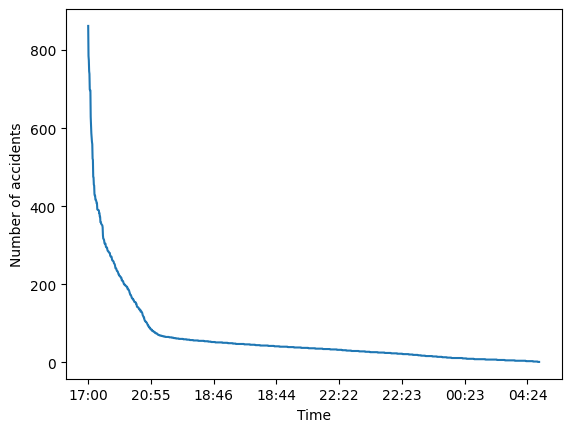

In [40]:
#using groupby, the time column is grouped and counted with respect to accident index and sorted in descending order
df_accident_2020.groupby('time')["accident_index"].count().sort_values(ascending =False).plot()
plt.xlabel('Time')
plt.ylabel('Number of accidents')

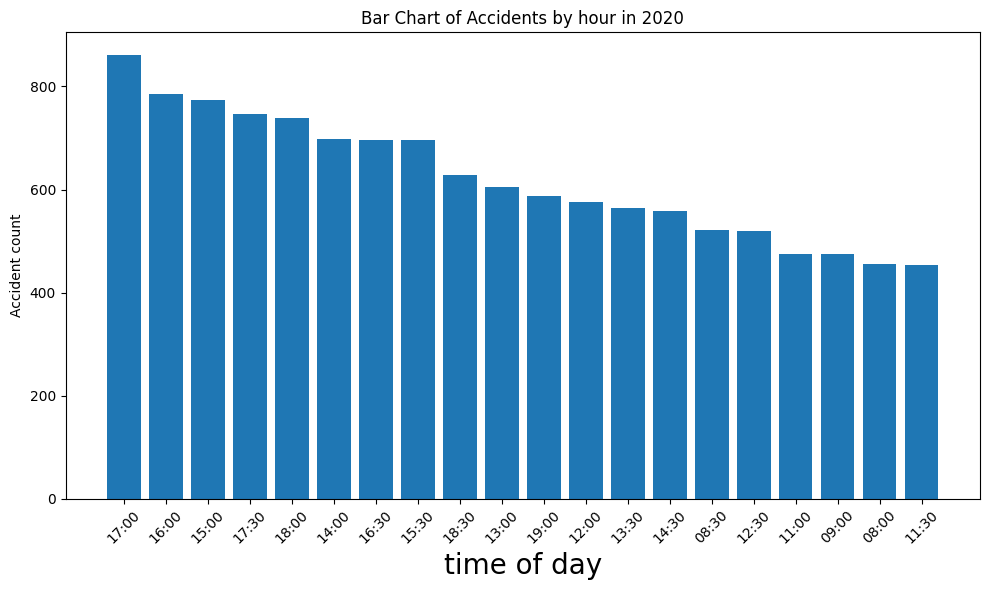

In [41]:
plt.figure(figsize=(10, 6)) #set the figure size
#signif_acc_time.time.hist(bins =7, color = 'red')
plt.bar(signif_acc_time['time'], signif_acc_time['number_of_accidents'])
plt.grid(False)
plt.title('Bar Chart of Accidents by hour in 2020')
plt.xlabel('time of day', fontsize = 20)
plt.ylabel('Accident count')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### ANSWER: The most significant hour of the day when accident happens is 17:00 GMT

#### To get the significant day of the week on which accidents occur

In [42]:
#display day of week column
df_accident_2020['day_of_week']

0          Tuesday
1           Monday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
91194    Wednesday
91195       Friday
91196    Wednesday
91197      Tuesday
91198      Tuesday
Name: day_of_week, Length: 91199, dtype: object

In [43]:
#get the counts of the unique values in day of week column
df_accident_2020['day_of_week'].value_counts()

Friday       14889
Thursday     14056
Wednesday    13564
Tuesday      13267
Monday       12772
Saturday     12336
Sunday       10315
Name: day_of_week, dtype: int64

**Friday has the highest counts while Sunday has the least count**

Text(0.5, 1.0, 'Line graph of Accident by Day of week')

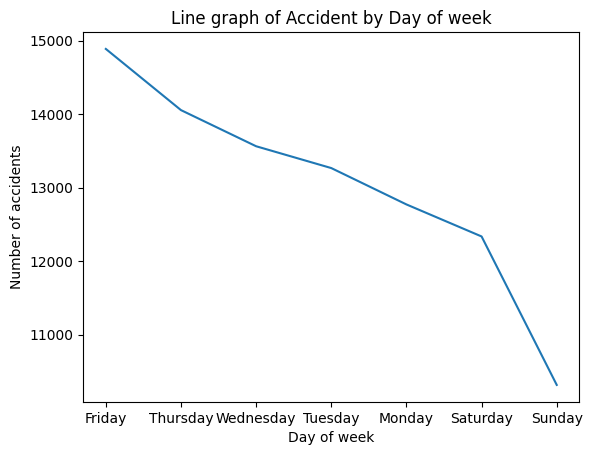

In [44]:
#using groupby, the day of week column is grouped and counted with respect to accident index and sorted in descending order
df_accident_2020.groupby('day_of_week')["accident_index"].count().sort_values(ascending =False).plot()
plt.xlabel('Day of week')
plt.ylabel('Number of accidents')
plt.title('Line graph of Accident by Day of week')

Text(0, 0.5, 'Accident count')

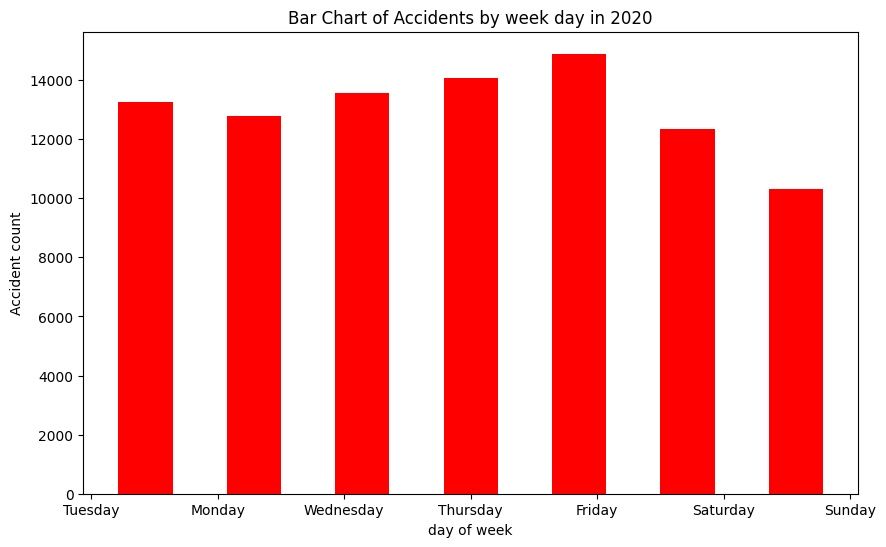

In [45]:
#plot bar chart of accidents by week
plt.figure(figsize=(10, 6))
df_accident_2020.day_of_week.hist(bins =7, rwidth = 0.5, color = 'red')
plt.grid(False)
plt.title('Bar Chart of Accidents by week day in 2020')
plt.xlabel('day of week')
plt.ylabel('Accident count')

### ANSWER:The significant day of the week in which accident occur is FRIDAY

## Exercise 2: For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?  

#### Insight into the vehicle type column

In [46]:
#get the frequency of the unique values in vehicle and show first 10
df_vehicle_2020['vehicle_type'].value_counts()
f = df_vehicle_2020['vehicle_type'].value_counts().head(10)
f

9     114145
1      16766
19     10338
3       7523
5       3784
8       2612
21      2501
11      2213
4       1691
90      1185
Name: vehicle_type, dtype: int64

Text(0.5, 1.0, 'Bar chart of Vehicle types involved in accident')

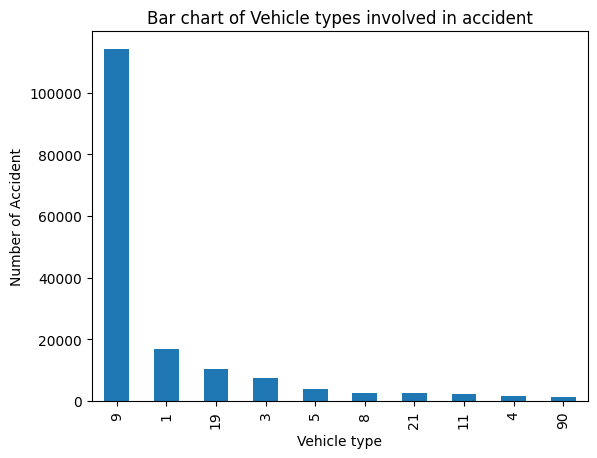

In [47]:
#plot the bar chart
f[:10].plot(kind= 'bar')
plt.xlabel('Vehicle type')
plt.ylabel('Number of Accident')
plt.title('Bar chart of Vehicle types involved in accident')

**Cars accounted for the highest number of vehicle type that was involved in accident, followed pedal cycles and Goods vehicle 3.5 tonnes max**

**However, the combined accidents of all categories of motorcycle will place it 3rd**

**motorcycle 125cc and under include [motorcycle over 50cc and up to 125cc == 03 and  motorcycle 50cc and under == 02**

**motorcycle over 125cc and up to 500cc ==04**

**motorycle over 500cc == 05**

In [48]:
#motorcycle 125cc and under include [motorcycle over 50cc and up to 125cc == 03 and  motorcycle 50cc and under == 02]
#motorcycle over 125cc and up to 500cc ==04
#motorycle over 500cc == 05

#create a list of the set of vehicle
veh_type = [2,3,4,5]

#get the info in the list from vehicle df into a new var
veh_set = df_vehicle_2020[df_vehicle_2020['vehicle_type'].isin(veh_type)]

In [49]:
#count the number of unique value in vehicle types of the new df
veh_set['vehicle_type'].value_counts()

3    7523
5    3784
4    1691
2    1128
Name: vehicle_type, dtype: int64

In [50]:
#display the new df
veh_set

vehicle_index accident_index  accident_year accident_reference  \
12             681728  2020010228020           2020          010228020   
32             681748  2020010228077           2020          010228077   
33             681749  2020010228086           2020          010228086   
36             681752  2020010228097           2020          010228097   
58             681774  2020010228148           2020          010228148   
...               ...            ...            ...                ...   
167195         848911  2020991010130           2020          991010130   
167292         849008  2020991011809           2020          991011809   
167301         849017  2020991012311           2020          991012311   
167304         849020  2020991012353           2020          991012353   
167371         849087  2020991030297           2020          991030297   

        vehicle_reference  vehicle_type  towing_and_articulation  \
12                      1             3                        0   
32                      2             2                        0   
33                      1             3                        0   
36                      2             3                        0   
58                      1             3                        0   
...                   ...           ...                      ...   
167195                  2             3                        0   
167292                  2             3                        0   
167301                  1             3                        0   
167304                  2             4                        0   
167371                  2             5                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
12                      3                       7                     3  ...   
32                     18                       8                     4  ...   
33                     18                       7                     3  ...   
36                     18                       1                     5  ...   
58                     14                       5                     1  ...   
...                   ...                     ...                   ...  ...   
167195                 14                       7                     3  ...   
167292                  5                       7                     3  ...   
167301                 18                       8                     4  ...   
167304                 18                       6                     2  ...   
167371                 16                       6                     2  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
12                              6              1             37   
32                              6              1             19   
33                              6              3             -1   
36                              6              1             20   
58                              6              1             20   
...                           ...            ...            ...   
167195                          6              1             47   
167292                          2              1             61   
167301                          1              1             35   
167304                          5              1             48   
167371                          5              1             38   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
12                       7                 114                1   
32                       4                  -1               -1   
33                      -1                  -1               -1   
36                       4                 125                1   
58                       4                 125                1   
...                    ...                 ...              ...   
167195                   8                 124                1   


Text(0, 0.5, 'Accident count')

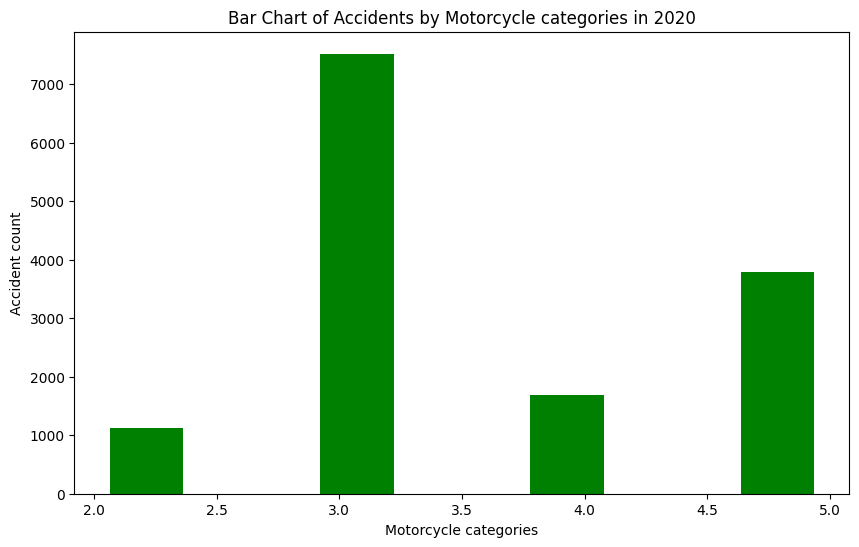

In [51]:
#plot bar chart of accidents by motorcycle category
plt.figure(figsize=(10, 6))
veh_set.vehicle_type.hist(bins =7, rwidth = 0.7, color = 'green')
plt.grid(False)
plt.title('Bar Chart of Accidents by Motorcycle categories in 2020')
plt.xlabel('Motorcycle categories')
plt.ylabel('Accident count')

**Of the 4 categories of motorcycles, motorcycles over 50cc and up to 125cc had the highest number of accidents while motorcycle 50cc and under had the least accident**

In [52]:
#Join accident df with the new var using the primary key accident index
veh_grouped = pd.merge(df_accident_2020, veh_set, on = 'accident_index')
veh_grouped

accident_index  accident_year_x accident_reference_x  \
0      2020010228020             2020            010228020   
1      2020010228077             2020            010228077   
2      2020010228086             2020            010228086   
3      2020010228097             2020            010228097   
4      2020010228148             2020            010228148   
...              ...              ...                  ...   
14121  2020991010130             2020            991010130   
14122  2020991011809             2020            991011809   
14123  2020991012311             2020            991012311   
14124  2020991012353             2020            991012353   
14125  2020991030297             2020            991030297   

       location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                   529718.0                192342.0  -0.127840  51.614971   
1                   531477.0                174550.0  -0.109087  51.454673   
2                   531043.0                176304.0  -0.114680  51.470537   
3                   528428.0                179923.0  -0.150994  51.503659   
4                   518467.0                185248.0  -0.292651  51.553691   
...                      ...                     ...        ...        ...   
14121               250655.0                658068.0  -4.383591  55.792760   
14122               268116.0                656638.0  -4.104624  55.785004   
14123               311646.0                683727.0  -3.419652  56.038240   
14124               318037.0                745230.0  -3.336269  56.591779   
14125               383664.0                810646.0  -2.271903  57.186317   

       police_force  accident_severity  number_of_vehicles  ...  \
0                 1                  3                   2  ...   
1                 1                  2                   2  ...   
2                 1                  3                   1  ...   
3                 1                  3                   2  ...   
4                 1                  3                   1  ...   
...             ...                ...                 ...  ...   
14121            99                  3                   2  ...   
14122            99                  3                   2  ...   
14123            99                  2                   2  ...   
14124            99                  3                   2  ...   
14125            99                  2                   2  ...   

       journey_purpose_of_driver sex_of_driver age_of_driver  \
0                              6             1            37   
1                              6             1            19   
2                              6             3            -1   
3                              6             1            20   
4                              6             1            20   
...                          ...           ...           ...   
14121                          6             1            47   
14122                          2             1            61   
14123                          1             1            35   
14124                          5             1            48   
14125                          5             1            38   

      age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
0                      7                 114               1              5   
1                      4                  -1              -1             -1   
2                     -1                  -1              -1             -1   
3                      4                 125               1              4   
4                      4                 125               1              0   
...                  ...                 ...             ...            ...   
14121                  8                 124               1             17   
14122                  9                 124               1              4   
14123                  6               

**Motorcycle over 50cc and up to 125cc == 03 has the highest rate of accidents**

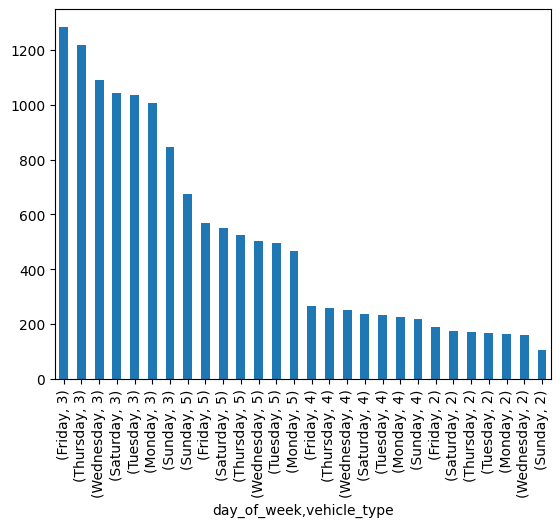

In [53]:
g = veh_grouped.groupby("day_of_week")["vehicle_type"].value_counts().sort_values(ascending =False).plot(kind ='bar')

**It is evident that category 03 (motorcycle above 50cc and up to 125cc ) accounted for the most accidents**.

**It is also obvious that accident occurred most on Friday for motorcycle 125cc and below [02 & 03]**

**It is also obvious that accident occurred most on Sunday for only motorcycle over 500cc**

**It is also obvious that accident occurred most on Friday for motorcycle over 125cc and up to 500cc**


In [54]:
#join veh_set with accident table
motorcycle_df =pd.merge(veh_set, df_accident_2020, how = 'inner', on = 'accident_index')
motorcycle_df

vehicle_index accident_index  accident_year_x accident_reference_x  \
0             681728  2020010228020             2020            010228020   
1             681748  2020010228077             2020            010228077   
2             681749  2020010228086             2020            010228086   
3             681752  2020010228097             2020            010228097   
4             681774  2020010228148             2020            010228148   
...              ...            ...              ...                  ...   
14121         848911  2020991010130             2020            991010130   
14122         849008  2020991011809             2020            991011809   
14123         849017  2020991012311             2020            991012311   
14124         849020  2020991012353             2020            991012353   
14125         849087  2020991030297             2020            991030297   

       vehicle_reference  vehicle_type  towing_and_articulation  \
0                      1             3                        0   
1                      2             2                        0   
2                      1             3                        0   
3                      2             3                        0   
4                      1             3                        0   
...                  ...           ...                      ...   
14121                  2             3                        0   
14122                  2             3                        0   
14123                  1             3                        0   
14124                  2             4                        0   
14125                  2             5                        0   

       vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                      3                       7                     3  ...   
1                     18                       8                     4  ...   
2                     18                       7                     3  ...   
3                     18                       1                     5  ...   
4                     14                       5                     1  ...   
...                  ...                     ...                   ...  ...   
14121                 14                       7                     3  ...   
14122                  5                       7                     3  ...   
14123                 18                       8                     4  ...   
14124                 18                       6                     2  ...   
14125                 16                       6                     2  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            5                 4   
1                                            0                 1   
2                                            0                 1   
3                                            0                 1   
4                                            4                 4   
...                                        ...               ...   
14121                                        0                 4   
14122                                        5                 4   
14123                                        0                 4   
14124                                        4                 1   
14125                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       1                        1   
1                       1                        1   
2                       1                        1   
3                       1                        1   
4                       1                        1   
...                   ...                      ...   
14121                   1                        1   
14122                   8                        2   
14123                   1

Text(0.5, 1.0, 'Count of motorcycles by day of week')

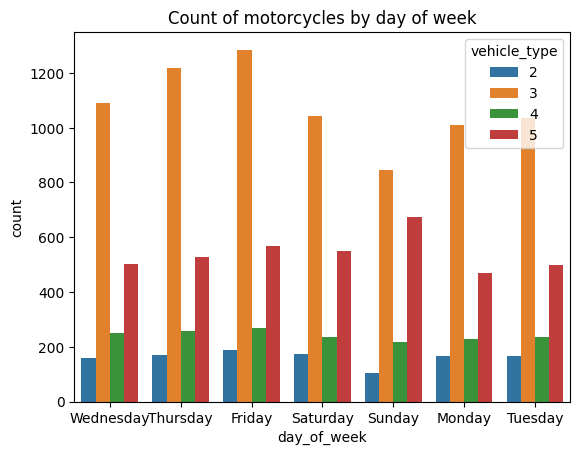

In [55]:
sns.countplot(x= 'day_of_week',hue = 'vehicle_type', data =veh_grouped)
plt.title("Count of motorcycles by day of week")

**Using countplot, Friday is the day with the greatest number of accidents**

**It can also been seen that for all the days of the week, motorcycle above 50cc and up to 125cc had more accidents than other categories. It is followed by Motorcycle over 500cc**

Text(0.5, 1.0, 'Plot of Accident by Motorcycle Category')

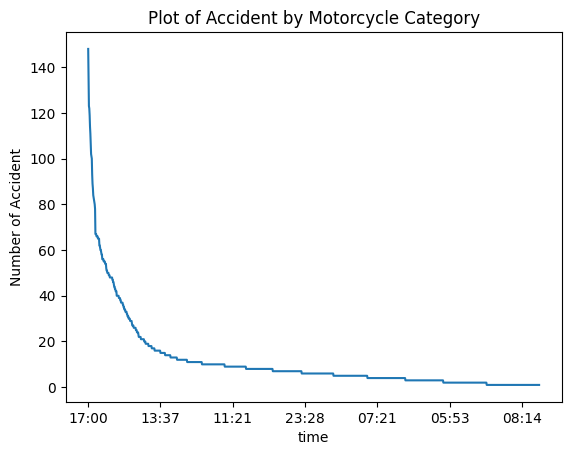

In [56]:
#get the number of accident for each unique value in time and sort in desc order
veh_grouped.groupby('time')['vehicle_type'].count().sort_values(ascending = False).plot()
plt.xlabel('time')
plt.ylabel('Number of Accident')
plt.title('Plot of Accident by Motorcycle Category')

**Most accidents occurred around 17:00 in the evening**

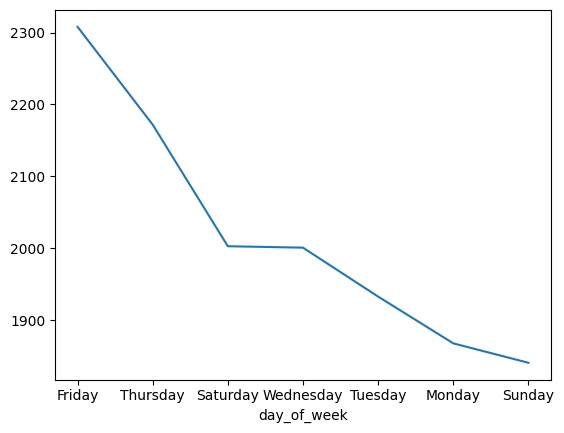

In [57]:
#group df by day of week, count by accident index and sort in desc order
veh_grouped.groupby('day_of_week')['accident_index'].count().sort_values(ascending = False).plot();

**Most accidents occurred on Friday**

In [58]:
df_accident_2020.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [59]:
#retrieve info (time, vehicle type from accident 2020, count num of acc at diff times join via primarykey  and order in desc order
query3= """

SELECT a.time, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type IN (02, 03, 04, 05)
GROUP BY a.time, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [60]:
#read sql into df
df_mcycle_below = pd.read_sql(query3, conn)

In [61]:
#display df
df_mcycle_below

time  number_of_accidents  vehicle_type
0     17:00                   76             3
1     17:30                   70             3
2     18:30                   69             3
3     15:30                   66             3
4     16:00                   66             3
...     ...                  ...           ...
3256  23:54                    1             3
3257  23:55                    1             3
3258  23:57                    1             2
3259  23:57                    1             3
3260  23:58                    1             2

[3261 rows x 3 columns]

## To check each category: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

## (i) Motorcycle 50cc and under

### To get significant hours of the day on which accidents occur for Motorcycle 50cc and under

In [62]:
query4= """

SELECT a.time, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 2 AND 3
GROUP BY a.time, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [63]:
#read sql into df
df_mcycle1 = pd.read_sql(query4, conn)

In [64]:
#display df
df_mcycle1

time  number_of_accidents  vehicle_type
0    19:00                   15             2
1    17:00                   14             2
2    17:10                   14             2
3    15:30                   13             2
4    15:00                   11             2
..     ...                  ...           ...
520  23:12                    1             2
521  23:26                    1             2
522  23:27                    1             2
523  23:57                    1             2
524  23:58                    1             2

[525 rows x 3 columns]

In [65]:
#get the top 20
df_mcycle1.head(20)
signif_mcycle = df_mcycle1.head(20)
signif_mcycle

time  number_of_accidents  vehicle_type
0   19:00                   15             2
1   17:00                   14             2
2   17:10                   14             2
3   15:30                   13             2
4   15:00                   11             2
5   16:30                   11             2
6   16:45                   11             2
7   17:30                   11             2
8   19:30                   10             2
9   14:15                    9             2
10  15:15                    9             2
11  18:50                    9             2
12  21:00                    9             2
13  13:15                    8             2
14  14:30                    8             2
15  17:20                    8             2
16  18:25                    8             2
17  18:30                    8             2
18  19:20                    8             2
19  13:00                    7             2

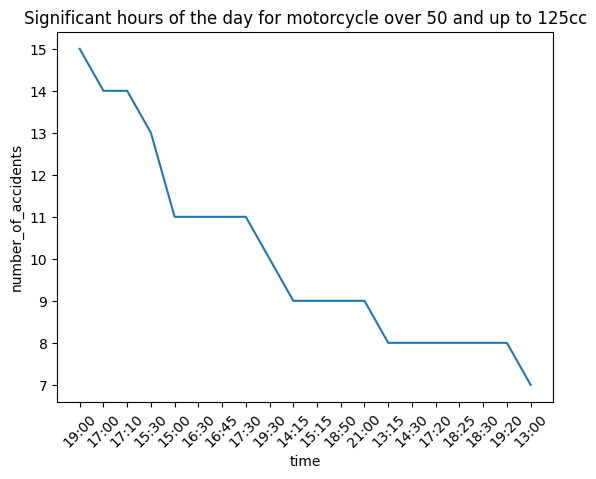

In [66]:
#plot the line of the top 20
sns.lineplot(data = signif_mcycle, x = "time", y = "number_of_accidents")
plt.title('Significant hours of the day for motorcycle over 50 and up to 125cc')
plt.xticks(rotation = 45);

**For motorcycle category 02, accidents occurred most at 19:00 in the evening**

### To get the significant day of week for motorcycles 50cc and below

In [67]:
query5= """

SELECT a.day_of_week, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 2
GROUP BY a.day_of_week, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [68]:
#read sql into df
df_mcycle1 = pd.read_sql(query5, conn)

In [69]:
#dispaly df
signif_mycle1 = df_mcycle1.head(20)

Text(0.5, 1.0, 'Significant hours of the day for motorcycle over 50 and up to 125cc')

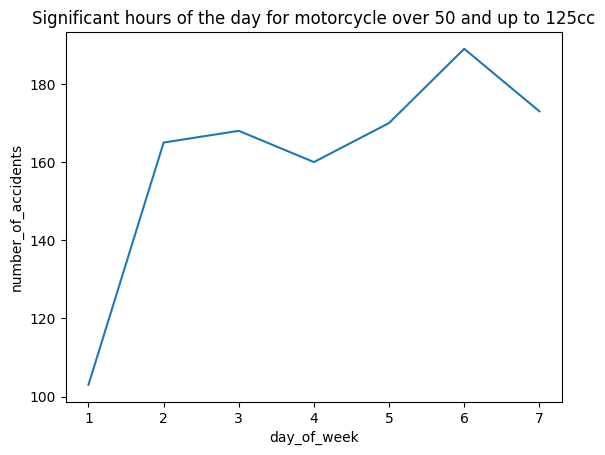

In [70]:
#plot the line of the top 20
sns.lineplot(data = signif_mycle1, x = "day_of_week", y = "number_of_accidents")
plt.title('Significant hours of the day for motorcycle over 50 and up to 125cc')
#plt.xticks(rotation = 45);

**For motorcycle category 02, accident occurred most on Friday (by default, week starts on Sunday- 1 and ends on Saturday- 6**

## (ii) Motorcycle over 50cc and up to 125cc

### To get significant hours of the day on which accidents occur for Motorcycle over 50cc and up to 125cc¶

In [71]:
#set query to get vehicle category 3
query6= """

SELECT a.time, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 3
GROUP BY a.time, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [72]:
#read sql into df
df_mcycle2 = pd.read_sql(query6, conn)

In [73]:
df_mcycle2

time  number_of_accidents  vehicle_type
0     17:00                   76             3
1     17:30                   70             3
2     18:30                   69             3
3     15:30                   66             3
4     16:00                   66             3
...     ...                  ...           ...
1133  23:49                    1             3
1134  23:52                    1             3
1135  23:54                    1             3
1136  23:55                    1             3
1137  23:57                    1             3

[1138 rows x 3 columns]

In [74]:
#get the top 20
df_mcycle2.head(20)
signif_mycle2 = df_mcycle2.head(20)

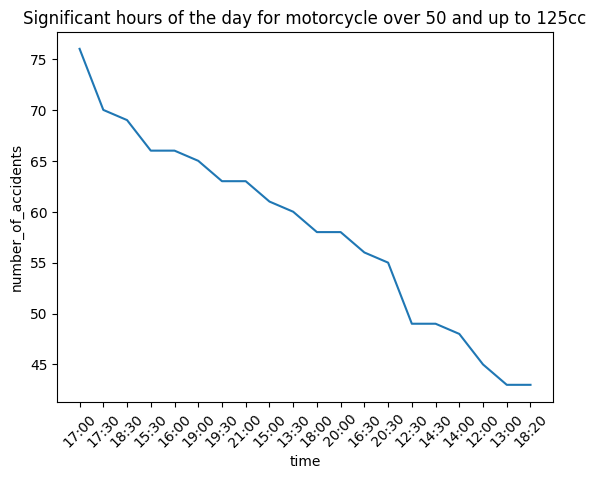

In [75]:
#plot the line of the top 20
sns.lineplot(data = signif_mycle2, x = "time", y = "number_of_accidents")
plt.title('Significant hours of the day for motorcycle over 50 and up to 125cc')
plt.xticks(rotation = 45);

**For motorcycle 03, accidents occurred most in the evening with the peak at 17:00**

### To get significant days of week on which accidents occur for Motorcycle over 50cc and up to 125cc

In [76]:
query7= """

SELECT a.day_of_week, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 3
GROUP BY a.day_of_week, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [77]:
#read sql query
df_mcycle2 = pd.read_sql(query7, conn)

In [78]:
df_mcycle2

day_of_week  number_of_accidents  vehicle_type
0            6                 1285             3
1            5                 1219             3
2            4                 1089             3
3            7                 1043             3
4            3                 1034             3
5            2                 1008             3
6            1                  845             3

Text(0.5, 1.0, 'Significant day of week for motorcycle over 50cc and up to 125cc')

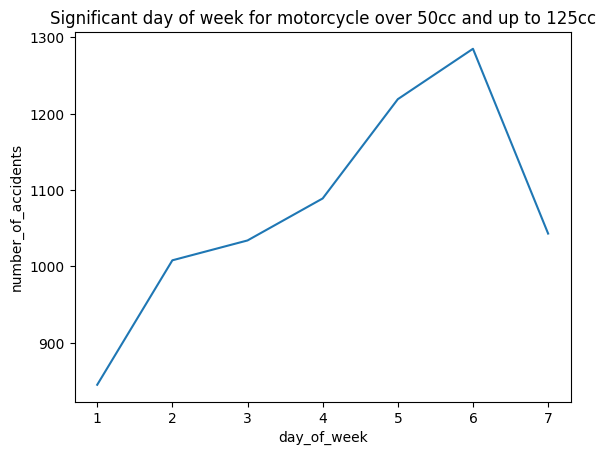

In [79]:
#plot the line 
sns.lineplot(data = df_mcycle2, x = "day_of_week", y = "number_of_accidents")
plt.title('Significant day of week for motorcycle over 50cc and up to 125cc')

**For motorcyle category 03, accidents occurred most on Friday**

## (iii) Motorcycle over 125cc and up to 500cc

### To get significant hours of the day on which accidents occur for Motorcycle over  125cc and up to 500cc¶

In [80]:
query8= """

SELECT a.time, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 4
GROUP BY a.time, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [81]:
# read the sql
df_mcycle3 = pd.read_sql(query8, conn)

In [82]:
#get the df top 20
df_mcycle3.head(20)
signif_mcycle3 = df_mcycle3.head(20)
signif_mcycle3

time  number_of_accidents  vehicle_type
0   17:00                   23             4
1   16:00                   18             4
2   15:30                   17             4
3   16:30                   17             4
4   15:00                   16             4
5   17:40                   14             4
6   14:00                   13             4
7   17:30                   13             4
8   18:00                   13             4
9   07:30                   12             4
10  12:00                   12             4
11  16:10                   12             4
12  16:40                   12             4
13  18:30                   12             4
14  13:45                   11             4
15  17:15                   11             4
16  11:30                   10             4
17  14:45                   10             4
18  15:45                   10             4
19  16:20                   10             4

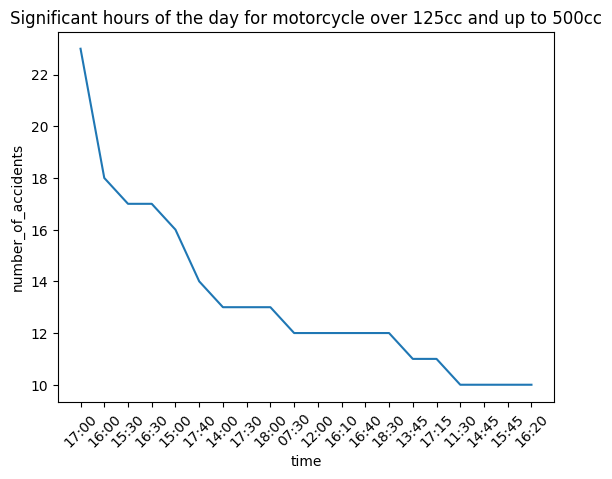

In [83]:
#plot the line 
sns.lineplot(data = signif_mcycle3, x = "time", y = "number_of_accidents")
plt.title('Significant hours of the day for motorcycle over 125cc and up to 500cc')
plt.xticks(rotation = 45);

**For motorcycle 04, most accidents occurred at 17:00 in the evening**

### To get significant week of day on which accidents occur for Motorcycle over 125cc and up to 500cc

In [84]:
query7= """

SELECT a.day_of_week, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 4
GROUP BY a.day_of_week, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [85]:
#read the sql query
df_mcycle3 = pd.read_sql(query7, conn)

In [86]:
df_mcycle3

day_of_week  number_of_accidents  vehicle_type
0            6                  267             4
1            5                  257             4
2            4                  251             4
3            7                  237             4
4            3                  234             4
5            2                  227             4
6            1                  218             4

Text(0.5, 1.0, 'Significant day of week for motorcycle over 125cc and up to 500cc')

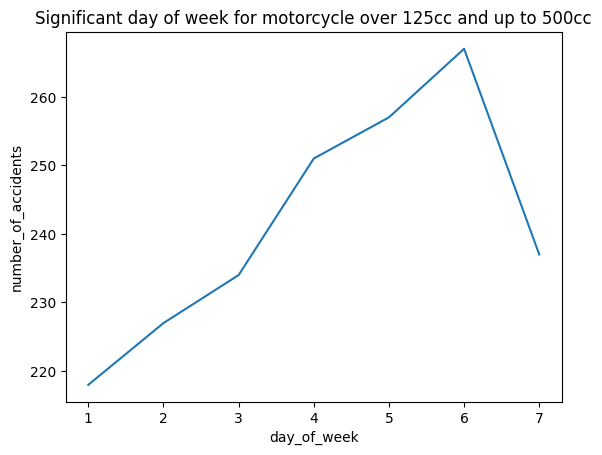

In [87]:
#plot
sns.lineplot(data = df_mcycle3, x = "day_of_week", y = "number_of_accidents")
plt.title('Significant day of week for motorcycle over 125cc and up to 500cc')

**For motorcycle 04, accidents occurred most on Friday**

## (iv) Motorcycle over 500c

### To get significant hours of the day on which accidents occur for Motorcycle over 500cc

In [88]:
query9= """

SELECT a.time, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type = 5
GROUP BY a.time, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [89]:
#read sql query
df_mcycle4 = pd.read_sql(query9, conn)

In [90]:
#get the top 20
df_mcycle4.head(20)
signif_mcycle4 = df_mcycle4.head(20)
signif_mcycle4

time  number_of_accidents  vehicle_type
0   17:30                   43             5
1   17:00                   35             5
2   14:00                   34             5
3   15:00                   31             5
4   16:00                   31             5
5   12:00                   30             5
6   13:30                   30             5
7   16:30                   30             5
8   13:00                   28             5
9   15:30                   27             5
10  18:00                   25             5
11  17:50                   22             5
12  19:00                   22             5
13  14:30                   21             5
14  17:05                   21             5
15  13:15                   20             5
16  16:40                   20             5
17  16:45                   20             5
18  12:30                   19             5
19  13:25                   19             5

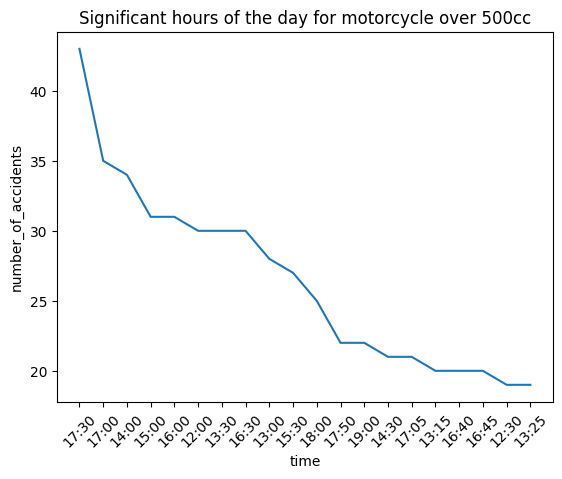

In [91]:
#plot the line
sns.lineplot(data = signif_mcycle4, x = "time", y = "number_of_accidents")
plt.title('Significant hours of the day for motorcycle over 500cc')
plt.xticks(rotation = 45);

**For motorcycle 05, accidents occurred most at 17:30 in the evening** 

### To get significant week of day on which accidents occur for Motorcycle over 500cc

In [92]:
query10= """

SELECT a.day_of_week, COUNT(a.accident_index) AS number_of_accidents, v.vehicle_type
FROM accident AS a
JOIN vehicle AS v ON a.accident_index = v.accident_index
WHERE a.accident_year = 2020 AND v.vehicle_type =  5
GROUP BY a.day_of_week, v.vehicle_type
ORDER BY number_of_accidents DESC;

"""

In [93]:
#read the sql
df_mcycle4 = pd.read_sql(query10, conn)

In [94]:
#get the top 20
df_mcycle4.head(20)
signif_mcycle4 = df_mcycle4.head(20)
signif_mcycle4

day_of_week  number_of_accidents  vehicle_type
0            1                  675             5
1            6                  567             5
2            7                  550             5
3            5                  526             5
4            4                  501             5
5            3                  497             5
6            2                  468             5

Text(0.5, 1.0, 'Significant day of week for motorcycle over 500cc')

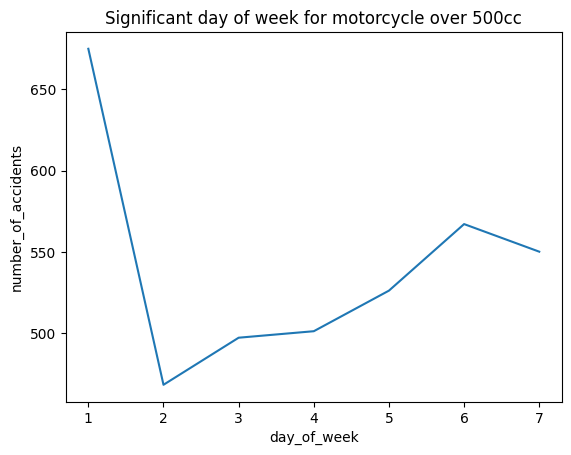

In [95]:
#plot the linegraph
sns.lineplot(data = df_mcycle4, x = "day_of_week", y = "number_of_accidents")
plt.title('Significant day of week for motorcycle over 500cc')

**Unlike other categories of motorcycle, 05 category had most accidents on Sunday. These motorcycles are the high engine capacity cycles used particularly for speed**

# Exercise 3: For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

**For casualty class, 01 represents Driver/Rider; 02 represents Vehicle passenger and 03 represents Pedestrian**

In [96]:
df_casualty_2020

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [97]:
#get the info for pedestrian and save in a variable
ped = df_casualty_2020[df_casualty_2020['casualty_class'] == 3]

In [98]:
#merge with accident df via primary key
ped_grouped = pd.merge(df_accident_2020, ped, on = 'accident_index')

Text(0.5, 1.0, 'Significant hours of the day for pedestrian')

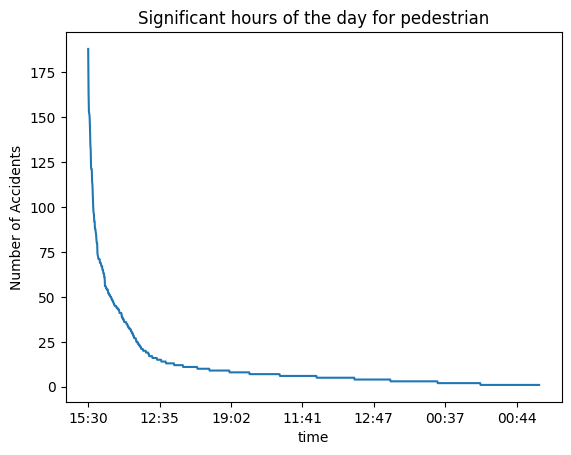

In [99]:
#group info by time and count accidnet index, sort in desc order
ped_grouped.groupby('time')['accident_index'].count().sort_values(ascending = False).plot();
plt.ylabel("Number of Accidents")
plt.title("Significant hours of the day for pedestrian")

**Accidents occurred most at 15:30**

Text(0.5, 1.0, 'Significant days of the week for pedestrian')

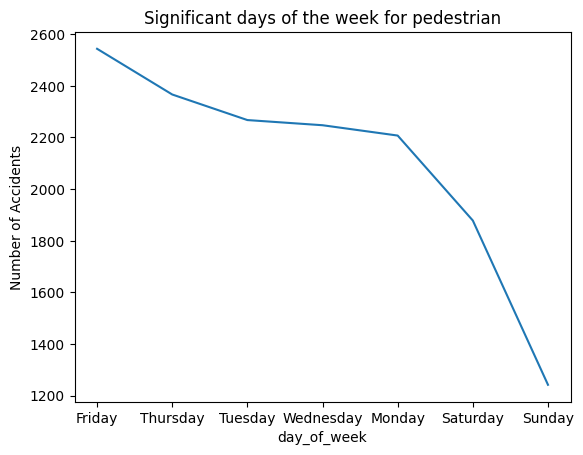

In [100]:
#group by week day, count accident index, and sort in desc order
ped_grouped.groupby('day_of_week')['accident_index'].count().sort_values(ascending = False).plot();
plt.ylabel("Number of Accidents")
plt.title("Significant days of the week for pedestrian")

**Accidents occurred most on Friday for Pedestrians**

## Exercise 4: Using the apriori algorithm, explore the impact of selected variables on accident severity.

### Accident severity analysis

In [101]:
#get the unique values in accident severity
accident_severity = df_accident_2020['accident_severity']
accident_severity.unique()

array([3, 2, 1], dtype=int64)

In [102]:
#get the frequency of each severity
accident_severity.value_counts()

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

Text(0.5, 1.0, 'Bar chart of accident severity')

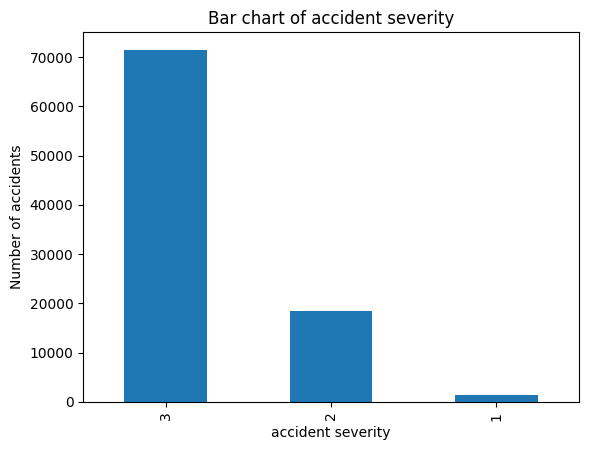

In [103]:
#plot the accident severity in bar chart
accident_severity.value_counts().plot(kind = 'bar')
plt.xlabel("accident severity")
plt.ylabel("Number of accidents")
plt.title("Bar chart of accident severity")

**Most accidents were slight while very few were fatal**

[Some selected variables that can impact accident severity:
speed_limit, 
weather_conditions, 
road_type,
light_conditions,
sex of driver,
age of driver
road_surface_conditons


In [104]:
#import libraries for apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [105]:
#create list to hold selected columns in selected table 
acc_var = ['accident_index', 'accident_severity', 'speed_limit', 'weather_conditions', 'road_type', 'road_surface_conditions','light_conditions']
veh_var = ['accident_index','sex_of_driver', 'age_of_driver']

In [106]:
#create df to select info in the var 
df_acc = df_accident_2020[acc_var]
df_veh = df_vehicle_2020[veh_var]

In [107]:
#merge df accident with casualty through primary key
merged_df = pd.merge(df_acc, df_veh, on = 'accident_index', how = 'inner')

In [108]:
#display merged df
merged_df

accident_index  accident_severity  speed_limit  weather_conditions  \
0       2020010219808                  3           20                   9   
1       2020010220496                  3           20                   1   
2       2020010228005                  3           30                   1   
3       2020010228006                  2           30                   1   
4       2020010228011                  3           30                   1   
...               ...                ...          ...                 ...   
167370  2020991030297                  2           60                   1   
167371  2020991030297                  2           60                   1   
167372  2020991030900                  3           30                   1   
167373  2020991030900                  3           30                   1   
167374  2020991032575                  3           30                   1   

        road_type  road_surface_conditions  light_conditions  sex_of_driver  \
0               6                        9                 1              2   
1               6                        1                 1              1   
2               6                        2                 4              3   
3               6                        1                 4              1   
4               6                        1                 4              1   
...           ...                      ...               ...            ...   
167370          6                        1                 1              1   
167371          6                        1                 1              1   
167372          6                        1                 1              2   
167373          6                        1                 1              1   
167374          6                        1                 1              1   

        age_of_driver  
0                  32  
1                  45  
2                  -1  
3                  44  
4                  20  
...               ...  
167370             57  
167371             38  
167372             68  
167373             76  
167374             39  

[167375 rows x 9 columns]

In [109]:
merged_df.shape

(167375, 9)

In [110]:
merged_df["age_of_driver"].value_counts()

-1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 3          2
 99         2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

### ONE HOT ENCODING

**one hot encoding is done for each of the selected variables**

#### Accident severity

In [111]:
#
acc_severity=pd.get_dummies(merged_df.accident_severity, prefix ="severity")
acc_severity

severity_1  severity_2  severity_3
0                0           0           1
1                0           0           1
2                0           0           1
3                0           1           0
4                0           0           1
...            ...         ...         ...
167370           0           1           0
167371           0           1           0
167372           0           0           1
167373           0           0           1
167374           0           0           1

[167375 rows x 3 columns]

#### speed limit

In [112]:
speed_limit=pd.get_dummies(merged_df.speed_limit, prefix ="speed")
speed_limit

speed_20  speed_30  speed_40  speed_50  speed_60  speed_70
0              1         0         0         0         0         0
1              1         0         0         0         0         0
2              0         1         0         0         0         0
3              0         1         0         0         0         0
4              0         1         0         0         0         0
...          ...       ...       ...       ...       ...       ...
167370         0         0         0         0         1         0
167371         0         0         0         0         1         0
167372         0         1         0         0         0         0
167373         0         1         0         0         0         0
167374         0         1         0         0         0         0

[167375 rows x 6 columns]

#### weather condition

In [113]:
weather_cond=pd.get_dummies(merged_df.weather_conditions, prefix ="weatcond")
weather_cond

weatcond_1  weatcond_2  weatcond_3  weatcond_4  weatcond_5  \
0                0           0           0           0           0   
1                1           0           0           0           0   
2                1           0           0           0           0   
3                1           0           0           0           0   
4                1           0           0           0           0   
...            ...         ...         ...         ...         ...   
167370           1           0           0           0           0   
167371           1           0           0           0           0   
167372           1           0           0           0           0   
167373           1           0           0           0           0   
167374           1           0           0           0           0   

        weatcond_6  weatcond_7  weatcond_8  weatcond_9  
0                0           0           0           1  
1                0           0           0           0  
2                0           0           0           0  
3                0           0           0           0  
4                0           0           0           0  
...            ...         ...         ...         ...  
167370           0           0           0           0  
167371           0           0           0           0  
167372           0           0           0           0  
167373           0           0           0           0  
167374           0           0           0           0  

[167375 rows x 9 columns]

#### Road type

In [114]:
road_type=pd.get_dummies(merged_df.road_type, prefix ="roadtype")
road_type

roadtype_1  roadtype_2  roadtype_3  roadtype_6  roadtype_7  roadtype_9
0                0           0           0           1           0           0
1                0           0           0           1           0           0
2                0           0           0           1           0           0
3                0           0           0           1           0           0
4                0           0           0           1           0           0
...            ...         ...         ...         ...         ...         ...
167370           0           0           0           1           0           0
167371           0           0           0           1           0           0
167372           0           0           0           1           0           0
167373           0           0           0           1           0           0
167374           0           0           0           1           0           0

[167375 rows x 6 columns]

#### light conditions

In [115]:
light_cond=pd.get_dummies(merged_df.light_conditions, prefix ="lightcond")
light_cond

lightcond_1  lightcond_4  lightcond_5  lightcond_6  lightcond_7
0                 1            0            0            0            0
1                 1            0            0            0            0
2                 0            1            0            0            0
3                 0            1            0            0            0
4                 0            1            0            0            0
...             ...          ...          ...          ...          ...
167370            1            0            0            0            0
167371            1            0            0            0            0
167372            1            0            0            0            0
167373            1            0            0            0            0
167374            1            0            0            0            0

[167375 rows x 5 columns]

#### road surface conditons

In [116]:
road_surf=pd.get_dummies(merged_df.road_surface_conditions, prefix ="roadsurf")
road_surf

roadsurf_1  roadsurf_2  roadsurf_3  roadsurf_4  roadsurf_5  roadsurf_9
0                0           0           0           0           0           1
1                1           0           0           0           0           0
2                0           1           0           0           0           0
3                1           0           0           0           0           0
4                1           0           0           0           0           0
...            ...         ...         ...         ...         ...         ...
167370           1           0           0           0           0           0
167371           1           0           0           0           0           0
167372           1           0           0           0           0           0
167373           1           0           0           0           0           0
167374           1           0           0           0           0           0

[167375 rows x 6 columns]

#### sex driver

In [117]:
sex_driver=pd.get_dummies(merged_df.sex_of_driver, prefix ="sexdriver")
sex_driver

sexdriver_1  sexdriver_2  sexdriver_3
0                 0            1            0
1                 1            0            0
2                 0            0            1
3                 1            0            0
4                 1            0            0
...             ...          ...          ...
167370            1            0            0
167371            1            0            0
167372            0            1            0
167373            1            0            0
167374            1            0            0

[167375 rows x 3 columns]

#### age of driver

In [118]:
age_driver=pd.get_dummies(merged_df.age_of_driver, prefix ="agedriver")
age_driver

agedriver_-1  agedriver_3  agedriver_4  agedriver_5  agedriver_6  \
0                  0            0            0            0            0   
1                  0            0            0            0            0   
2                  1            0            0            0            0   
3                  0            0            0            0            0   
4                  0            0            0            0            0   
...              ...          ...          ...          ...          ...   
167370             0            0            0            0            0   
167371             0            0            0            0            0   
167372             0            0            0            0            0   
167373             0            0            0            0            0   
167374             0            0            0            0            0   

        agedriver_7  agedriver_8  agedriver_9  agedriver_10  agedriver_11  \
0                 0            0            0             0             0   
1                 0            0            0             0             0   
2                 0            0            0             0             0   
3                 0            0            0             0             0   
4                 0            0            0             0             0   
...             ...          ...          ...           ...           ...   
167370            0            0            0             0             0   
167371            0            0            0             0             0   
167372            0            0            0             0             0   
167373            0            0            0             0             0   
167374            0            0            0             0             0   

        ...  agedriver_91  agedriver_92  agedriver_93  agedriver_94  \
0       ...             0             0             0             0   
1       ...             0             0             0             0   
2       ...             0             0             0             0   
3       ...             0             0             0             0   
4       ...             0             0             0             0   
...     ...           ...           ...           ...           ...   
167370  ...             0             0             0             0   
167371  ...             0             0             0             0   
167372  ...             0             0             0             0   
167373  ...             0             0             0             0   
167374  ...             0             0             0             0   

        agedriver_95  agedriver_96  agedriver_97  agedriver_98  agedriver_99  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
167370             0             0             0             0             0   
167371             0             0             0             0             0   
167372             0             0             0             0             0   
167373             0             0             0             0             0   
167374             0             0             0             0             0   

        agedriver_100  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
167370              0  
167371              0  
167372              0  
167373              0  
167374              0  

[167375 rows x 99 columns]

In [119]:
df_acc_onehot=pd.concat([acc_severity, speed_limit, weather_cond, road_type, light_cond, sex_driver, age_driver, road_surf], axis= 1)

In [120]:
df_acc_onehot

severity_1  severity_2  severity_3  speed_20  speed_30  speed_40  \
0                0           0           1         1         0         0   
1                0           0           1         1         0         0   
2                0           0           1         0         1         0   
3                0           1           0         0         1         0   
4                0           0           1         0         1         0   
...            ...         ...         ...       ...       ...       ...   
167370           0           1           0         0         0         0   
167371           0           1           0         0         0         0   
167372           0           0           1         0         1         0   
167373           0           0           1         0         1         0   
167374           0           0           1         0         1         0   

        speed_50  speed_60  speed_70  weatcond_1  ...  agedriver_97  \
0              0         0         0           0  ...             0   
1              0         0         0           1  ...             0   
2              0         0         0           1  ...             0   
3              0         0         0           1  ...             0   
4              0         0         0           1  ...             0   
...          ...       ...       ...         ...  ...           ...   
167370         0         1         0           1  ...             0   
167371         0         1         0           1  ...             0   
167372         0         0         0           1  ...             0   
167373         0         0         0           1  ...             0   
167374         0         0         0           1  ...             0   

        agedriver_98  agedriver_99  agedriver_100  roadsurf_1  roadsurf_2  \
0                  0             0              0           0           0   
1                  0             0              0           1           0   
2                  0             0              0           0           1   
3                  0             0              0           1           0   
4                  0             0              0           1           0   
...              ...           ...            ...         ...         ...   
167370             0             0              0           1           0   
167371             0             0              0           1           0   
167372             0             0              0           1           0   
167373             0             0              0           1           0   
167374             0             0              0           1           0   

        roadsurf_3  roadsurf_4  roadsurf_5  roadsurf_9  
0                0           0           0           1  
1                0           0           0           0  
2                0           0           0           0  
3                0           0           0           0  
4                0           0           0           0  
...            ...         ...         ...         ...  
167370           0           0           0           0  
167371           0           0           0           0  
167372           0           0           0           0  
167373           0           0           0           0  
167374           0           0           0           0  

[167375 rows x 137 columns]

In [121]:
#apply apriori to one hot encoded data with min suppost of .5
apriori_df = apriori(df_acc_onehot, min_support=0.5, use_colnames=True)
apriori_df 

C:\Users\707729\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                               itemsets
0   0.795650                           (severity_3)
1   0.570127                             (speed_30)
2   0.783086                           (weatcond_1)
3   0.724577                           (roadtype_6)
4   0.715985                          (lightcond_1)
5   0.634820                          (sexdriver_1)
6   0.698916                           (roadsurf_1)
7   0.618605               (severity_3, weatcond_1)
8   0.566226               (roadtype_6, severity_3)
9   0.573909              (lightcond_1, severity_3)
10  0.555495               (severity_3, roadsurf_1)
11  0.575349               (roadtype_6, weatcond_1)
12  0.590052              (lightcond_1, weatcond_1)
13  0.500810              (sexdriver_1, weatcond_1)
14  0.655259               (roadsurf_1, weatcond_1)
15  0.526554              (lightcond_1, roadtype_6)
16  0.510847               (roadtype_6, roadsurf_1)
17  0.547531              (lightcond_1, roadsurf_1)
18  0.518954   (severity_3, roadsurf_1, weatcond_1)
19  0.516320  (lightcond_1, roadsurf_1, weatcond_1)

In [122]:
apriori_df[apriori_df["support"] >= .70]

support       itemsets
0  0.795650   (severity_3)
2  0.783086   (weatcond_1)
3  0.724577   (roadtype_6)
4  0.715985  (lightcond_1)

In [123]:
#get the length of each frquent itemset
apriori_df["length"] = apriori_df["itemsets"].apply(lambda x:len(x))

In [124]:
apriori_df

support                               itemsets  length
0   0.795650                           (severity_3)       1
1   0.570127                             (speed_30)       1
2   0.783086                           (weatcond_1)       1
3   0.724577                           (roadtype_6)       1
4   0.715985                          (lightcond_1)       1
5   0.634820                          (sexdriver_1)       1
6   0.698916                           (roadsurf_1)       1
7   0.618605               (severity_3, weatcond_1)       2
8   0.566226               (roadtype_6, severity_3)       2
9   0.573909              (lightcond_1, severity_3)       2
10  0.555495               (severity_3, roadsurf_1)       2
11  0.575349               (roadtype_6, weatcond_1)       2
12  0.590052              (lightcond_1, weatcond_1)       2
13  0.500810              (sexdriver_1, weatcond_1)       2
14  0.655259               (roadsurf_1, weatcond_1)       2
15  0.526554              (lightcond_1, roadtype_6)       2
16  0.510847               (roadtype_6, roadsurf_1)       2
17  0.547531              (lightcond_1, roadsurf_1)       2
18  0.518954   (severity_3, roadsurf_1, weatcond_1)       3
19  0.516320  (lightcond_1, roadsurf_1, weatcond_1)       3

**A combination of weatcond_1, lightcond_1, roadsurf_1 or weatcond_1, severity_3, roadsurf_1 occurs together 0.5 times**

In [125]:
apriori_df1 = apriori_df [apriori_df ['length']> 1]
apriori_df1

support                               itemsets  length
7   0.618605               (severity_3, weatcond_1)       2
8   0.566226               (roadtype_6, severity_3)       2
9   0.573909              (lightcond_1, severity_3)       2
10  0.555495               (severity_3, roadsurf_1)       2
11  0.575349               (roadtype_6, weatcond_1)       2
12  0.590052              (lightcond_1, weatcond_1)       2
13  0.500810              (sexdriver_1, weatcond_1)       2
14  0.655259               (roadsurf_1, weatcond_1)       2
15  0.526554              (lightcond_1, roadtype_6)       2
16  0.510847               (roadtype_6, roadsurf_1)       2
17  0.547531              (lightcond_1, roadsurf_1)       2
18  0.518954   (severity_3, roadsurf_1, weatcond_1)       3
19  0.516320  (lightcond_1, roadsurf_1, weatcond_1)       3

In [126]:
# get the freq itemset along with their support
freq_items_sets=apriori(df_acc_onehot , min_support=0.2, use_colnames=True)

C:\Users\707729\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [127]:
##pd.set_option('display.max_rows', None)##

In [128]:
rules=association_rules(freq_items_sets, metric="confidence", min_threshold=0.7)
rules.head(10)

antecedents    consequents  antecedent support  consequent support  \
0     (speed_30)   (severity_3)            0.570127            0.795650   
1   (severity_3)   (weatcond_1)            0.795650            0.783086   
2   (weatcond_1)   (severity_3)            0.783086            0.795650   
3   (roadtype_6)   (severity_3)            0.724577            0.795650   
4   (severity_3)   (roadtype_6)            0.795650            0.724577   
5  (lightcond_1)   (severity_3)            0.715985            0.795650   
6   (severity_3)  (lightcond_1)            0.795650            0.715985   
7  (sexdriver_1)   (severity_3)            0.634820            0.795650   
8  (sexdriver_2)   (severity_3)            0.249858            0.795650   
9   (roadsurf_1)   (severity_3)            0.698916            0.795650   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.465362    0.816243  1.025882  0.011740    1.112065       0.058688  
1  0.618605    0.777483  0.992845 -0.004458    0.974822      -0.034062  
2  0.618605    0.789958  0.992845 -0.004458    0.972898      -0.032153  
3  0.566226    0.781457  0.982161 -0.010284    0.935055      -0.061865  
4  0.566226    0.711651  0.982161 -0.010284    0.955174      -0.081625  
5  0.573909    0.801565  1.007434  0.004235    1.029808       0.025982  
6  0.573909    0.721308  1.007434  0.004235    1.019099       0.036111  
7  0.490055    0.771959  0.970224 -0.015040    0.896110      -0.077524  
8  0.206423    0.826160  1.038345  0.007623    1.175502       0.049229  
9  0.555495    0.794796  0.998926 -0.000597    0.995835      -0.003559

In [129]:
#get association rules
rules=association_rules(freq_items_sets, metric="lift", min_threshold=0.7)
rules.head(10)

antecedents    consequents  antecedent support  consequent support  \
0     (speed_30)   (severity_3)            0.570127            0.795650   
1   (severity_3)     (speed_30)            0.795650            0.570127   
2   (severity_3)   (weatcond_1)            0.795650            0.783086   
3   (weatcond_1)   (severity_3)            0.783086            0.795650   
4   (roadtype_6)   (severity_3)            0.724577            0.795650   
5   (severity_3)   (roadtype_6)            0.795650            0.724577   
6  (lightcond_1)   (severity_3)            0.715985            0.795650   
7   (severity_3)  (lightcond_1)            0.795650            0.715985   
8  (sexdriver_1)   (severity_3)            0.634820            0.795650   
9   (severity_3)  (sexdriver_1)            0.795650            0.634820   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.465362    0.816243  1.025882  0.011740    1.112065       0.058688  
1  0.465362    0.584883  1.025882  0.011740    1.035546       0.123458  
2  0.618605    0.777483  0.992845 -0.004458    0.974822      -0.034062  
3  0.618605    0.789958  0.992845 -0.004458    0.972898      -0.032153  
4  0.566226    0.781457  0.982161 -0.010284    0.935055      -0.061865  
5  0.566226    0.711651  0.982161 -0.010284    0.955174      -0.081625  
6  0.573909    0.801565  1.007434  0.004235    1.029808       0.025982  
7  0.573909    0.721308  1.007434  0.004235    1.019099       0.036111  
8  0.490055    0.771959  0.970224 -0.015040    0.896110      -0.077524  
9  0.490055    0.615918  0.970224 -0.015040    0.950786      -0.130572

In [130]:
rules=association_rules(freq_items_sets, metric="support", min_threshold=0.6)
rules.head(10)

antecedents   consequents  antecedent support  consequent support  \
0  (severity_3)  (weatcond_1)            0.795650            0.783086   
1  (weatcond_1)  (severity_3)            0.783086            0.795650   
2  (roadsurf_1)  (weatcond_1)            0.698916            0.783086   
3  (weatcond_1)  (roadsurf_1)            0.783086            0.698916   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.618605    0.777483  0.992845 -0.004458    0.974822      -0.034062  
1  0.618605    0.789958  0.992845 -0.004458    0.972898      -0.032153  
2  0.655259    0.937537  1.197234  0.107948    3.472674       0.547160  
3  0.655259    0.836765  1.197234  0.107948    1.844488       0.759477

In [131]:
rules[rules["confidence"] == 1 ].head(10)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

**None of the itemset have confidence equal to 1**

In [132]:
rules[rules["lift"] >= 1].head(10)

antecedents   consequents  antecedent support  consequent support  \
2  (roadsurf_1)  (weatcond_1)            0.698916            0.783086   
3  (weatcond_1)  (roadsurf_1)            0.783086            0.698916   

    support  confidence      lift  leverage  conviction  zhangs_metric  
2  0.655259    0.937537  1.197234  0.107948    3.472674       0.547160  
3  0.655259    0.836765  1.197234  0.107948    1.844488       0.759477

### Road type and accident severity

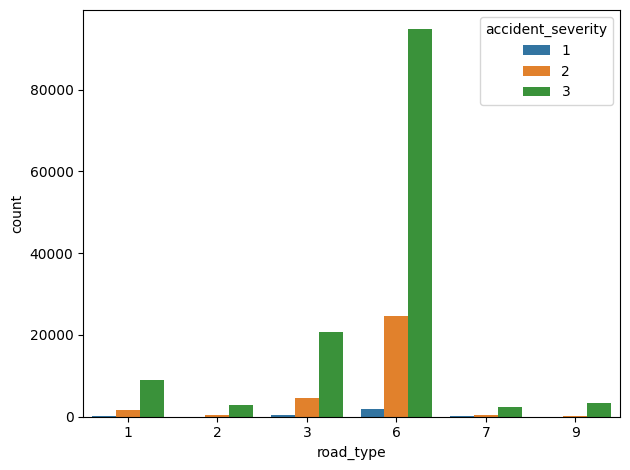

In [133]:
sns.countplot(data=merged_df, x="road_type", hue="accident_severity")
plt.tight_layout()
#sns.lineplot(data=, x=, y=, hue="day_of_week")

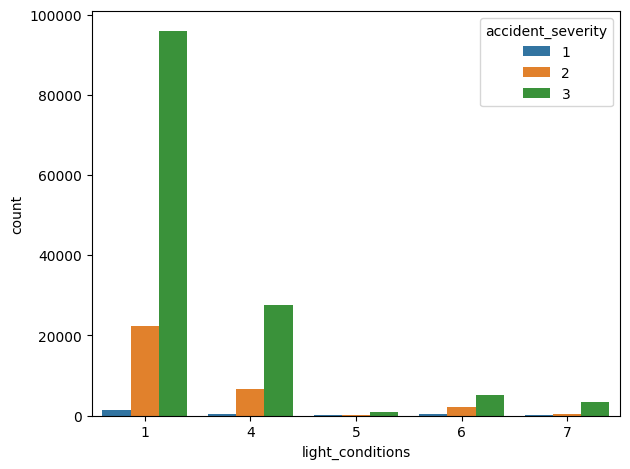

In [134]:
sns.countplot(data=merged_df, x="light_conditions", hue="accident_severity")
plt.tight_layout()

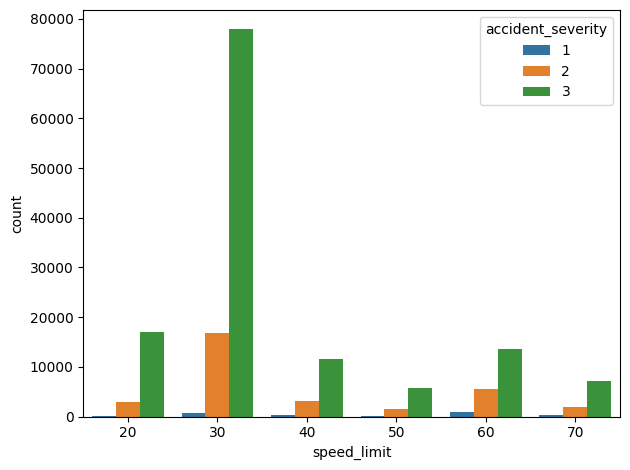

In [135]:
sns.countplot(data=merged_df, x="speed_limit", hue="accident_severity")
plt.tight_layout()

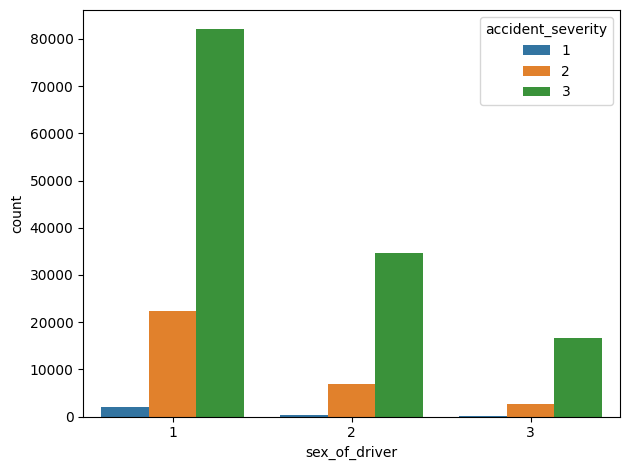

In [136]:
sns.countplot(data=merged_df, x="sex_of_driver", hue="accident_severity")
plt.tight_layout()

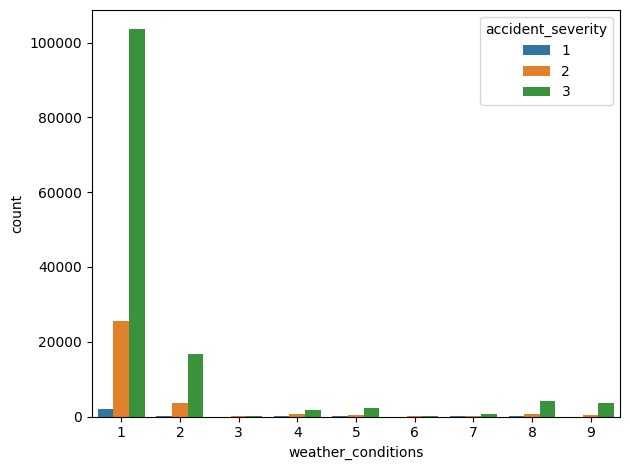

In [137]:
sns.countplot(data=merged_df, x="weather_conditions", hue="accident_severity")
plt.tight_layout()

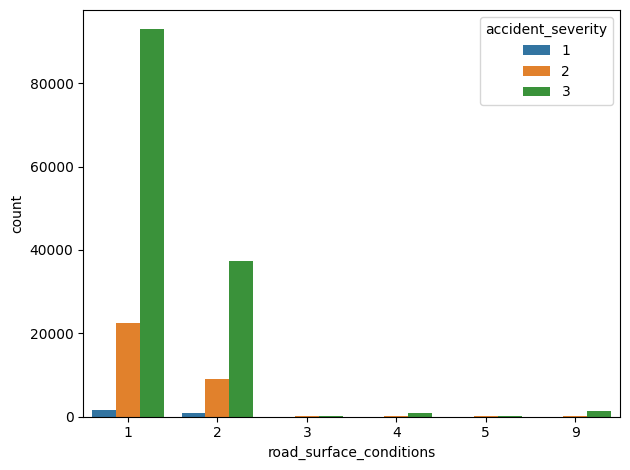

In [138]:
sns.countplot(data=merged_df, x="road_surface_conditions", hue="accident_severity")
plt.tight_layout()

# Exercise 5: Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. 

In [139]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df_accident_2020

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

      weather_conditions road_surface_conditions  special_conditions_at_site  \
0                      9                       9                           0   
1                      1                       1                           0   
2                      1                       2                           0   
3                      1                       1                           0   
4                      1                       1                           0   
...                  ...                     ...                         ...   
91194                  1                       1                           0   
91195                  1                       1                           0   
91196                  1                  

In [141]:
acc_var1 = ['accident_index', 'accident_severity', 'longitude', 'latitude', 'speed_limit', 'weather_conditions', 'junction_control', 'urban_or_rural_area', 'second_road_class', 'road_type', 'police_force', 'lsoa_of_accident_location', 'light_conditions']
cas_var1 = ['accident_index', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'pedestrian_location']
veh_var1 = ['accident_index', 'vehicle_type', 'sex_of_driver', 'age_of_driver', 'engine_capacity_cc', 'age_of_vehicle']

In [142]:
df_acc1 = df_accident_2020[acc_var1]
df_cas1 = df_casualty_2020[cas_var1]
df_veh1 = df_vehicle_2020[veh_var1]

In [143]:
merge_df1 = pd.merge(df_acc1, df_cas1, on = 'accident_index', how = 'inner')

In [144]:
merged_df2 = pd.merge(merge_df1, df_veh1, on = 'accident_index', how = 'inner')

In [145]:
merged_df2

accident_index  accident_severity  longitude   latitude  speed_limit  \
0       2020010219808                  3  -0.254001  51.462262           20   
1       2020010220496                  3  -0.139253  51.470327           20   
2       2020010220496                  3  -0.139253  51.470327           20   
3       2020010228005                  3  -0.178719  51.529614           30   
4       2020010228006                  2  -0.001683  51.541210           30   
...               ...                ...        ...        ...          ...   
220430  2020991030297                  2  -2.271903  57.186317           60   
220431  2020991030297                  2  -2.271903  57.186317           60   
220432  2020991030900                  3  -3.968753  55.950940           30   
220433  2020991030900                  3  -3.968753  55.950940           30   
220434  2020991032575                  3  -4.561040  56.003843           30   

        weather_conditions  junction_control  urban_or_rural_area  \
0                        9                -1                    1   
1                        1                 2                    1   
2                        1                 2                    1   
3                        1                 1                    1   
4                        1                -1                    1   
...                    ...               ...                  ...   
220430                   1                -1                    2   
220431                   1                -1                    2   
220432                   1                 4                    1   
220433                   1                 4                    1   
220434                   1                -1                    1   

        second_road_class  road_type  ...  light_conditions casualty_class  \
0                       0          6  ...                 1              3   
1                       6          6  ...                 1              3   
2                       6          6  ...                 1              3   
3                       6          6  ...                 4              3   
4                       0          6  ...                 4              3   
...                   ...        ...  ...               ...            ...   
220430                  6          6  ...                 1              1   
220431                  6          6  ...                 1              1   
220432                  6          6  ...                 1              1   
220433                  6          6  ...                 1              1   
220434                  0          6  ...                 1              3   

        sex_of_casualty  age_of_casualty  pedestrian_location  vehicle_type  \
0                     1               31                    9             9   
1                     2                2                    1             9   
2                     2                4                    1             9   
3                     1               23                    5             9   
4                     1               47                    4             8   
...                 ...              ...                  ...           ...   
220430                1               38                    0             9   
220431                1               38                    0             5   
220432                1               76                    0             9   
220433                1               76                    0             1   
220434                1               48                    9             9   

        sex_of_driver  age_of_driver  engine_capacity_cc  age_of_vehicle  
0                   2             32                1968               6  
1                   1             45                1395               2  
2                   1             45                1395               2  
3                   3             -1       

### Cleaning Longitude and latitude

In [146]:
merged_df2.isnull().sum()

accident_index                0
accident_severity             0
longitude                    34
latitude                     34
speed_limit                   0
weather_conditions            0
junction_control              0
urban_or_rural_area           0
second_road_class             0
road_type                     0
police_force                  0
lsoa_of_accident_location     0
light_conditions              0
casualty_class                0
sex_of_casualty               0
age_of_casualty               0
pedestrian_location           0
vehicle_type                  0
sex_of_driver                 0
age_of_driver                 0
engine_capacity_cc            0
age_of_vehicle                0
dtype: int64

In [147]:
#replacing null value in latitude with median
medianlat=merged_df2['latitude'].median()
merged_df2['latitude'].fillna(medianlat, inplace=True)

In [148]:
#replacing null value in longitude with median
medianlong=merged_df2['longitude'].median()
merged_df2['longitude'].fillna(medianlong, inplace=True )

## filter data based on region

### lsoa01nm will be used to filter in order to get Humberside region, Kingston upon Hull, East Riding of Yorkshire

In [149]:
#lsoa will be merged with the previously merged df
new_merged = merged_df2.merge(df_lsoa_2020, left_on = "lsoa_of_accident_location", right_on = 'lsoa01cd')

In [150]:
#create a list of region focus
region = ["Kingston upon Hull", "East Riding of Yorkshire", "Humberside"]

#check if values in lsoa01nm contains any value in region or police force equal 16
new_merged[new_merged['lsoa01nm'].str.contains('|'.join(region)) | (new_merged["police_force"] == 16)]

accident_index  accident_severity  longitude   latitude  speed_limit  \
83493  2020160914930                  3  -0.393424  53.744936           30   
83494  2020160914930                  3  -0.393424  53.744936           30   
83495  2020160918418                  3  -0.400627  53.744520           30   
83496  2020160918418                  3  -0.400627  53.744520           30   
83497  2020160936879                  3  -0.400523  53.744482           30   
...              ...                ...        ...        ...          ...   
87473  2020161012614                  3  -0.408728  53.843568           30   
87474  2020161012614                  3  -0.408728  53.843568           30   
87475  2020161012614                  3  -0.408728  53.843568           30   
87476  2020161012744                  3  -0.428826  53.743858           30   
87477  2020161012744                  3  -0.428826  53.743858           30   

       weather_conditions  junction_control  urban_or_rural_area  \
83493                   1                 2                    1   
83494                   1                 2                    1   
83495                   1                 4                    1   
83496                   1                 4                    1   
83497                   1                 4                    1   
...                   ...               ...                  ...   
87473                   1                -1                    1   
87474                   1                -1                    1   
87475                   1                -1                    1   
87476                   1                 4                    1   
87477                   1                 4                    1   

       second_road_class  road_type  ...  age_of_driver engine_capacity_cc  \
83493                  6          6  ...             24               1248   
83494                  6          6  ...             48               1968   
83495                  6          3  ...             34               1997   
83496                  6          3  ...             61                 -1   
83497                  4          6  ...             22               1461   
...                  ...        ...  ...            ...                ...   
87473                  0          6  ...             -1                 -1   
87474                  0          6  ...             -1                 -1   
87475                  0          6  ...             -1                 -1   
87476                  6          6  ...             10                 -1   
87477                  6          6  ...             -1                 -1   

       age_of_vehicle  objectid   lsoa01cd                       lsoa01nm  \
83493              11     12777  E01012777        Kingston upon Hull 028E   
83494               5     12777  E01012777        Kingston upon Hull 028E   
83495               4     12777  E01012777        Kingston upon Hull 028E   
83496              -1     12777  E01012777        Kingston upon Hull 028E   
83497               4     12777  E01012777        Kingston upon Hull 028E   
...               ...       ...        ...                            ...   
87473              -1     13037  E01013037  East Riding of Yorkshire 019B   
87474              -1     13037  E01013037  East Riding of Yorkshire 019B   
87475              -1     13037  E01013037  East Riding of Yorkshire 019B   
87476              -1     13107  E01013107  East Riding of Yorkshire 034E   
87477              -1     13107  E01013107  East Riding of Yorkshire 034E   

                           lsoa01nmw   shape__area  shape__length  \
83493        Kingston upon Hull 028E  3.567509e+05    3963.099631   
83494        Kingston upon Hull 028E  3.567509e+05    3963.099631   
83495        Kingston upon Hull 028E  3.567509e+05    3963.099631   
83496        Kingston upon Hull 028E  3.567509e+05    3963.099631   
83497        Kingston upon Hull 028E  3.56750

In [151]:
df_new_merged = new_merged[new_merged['lsoa01nm'].str.contains('|'.join(region)) | (new_merged["police_force"] == 16)]

In [152]:
df_new_merged['lsoa01nmw'].value_counts()          

North Lincolnshire 021A          56
Kingston upon Hull 016D          56
Kingston upon Hull 020B          50
Kingston upon Hull 029A          50
North Lincolnshire 013A          46
                                 ..
Kingston upon Hull 032E           1
East Riding of Yorkshire 010B     1
Kingston upon Hull 004F           1
East Riding of Yorkshire 007D     1
East Riding of Yorkshire 034D     1
Name: lsoa01nmw, Length: 479, dtype: int64

In [153]:
#create a function to categorise names based on similar regions
def groupRegion(region):
    if region.startswith("Kingston upon Hull"):
        return "Hull"
    elif region.startswith("East Riding of Yorkshire"):
        return "Yorkshire"
    else:
        return "Humberside" #humberside rep North Lincolnshire and Northeast Lincolnshire

In [154]:
df_new_merged["Region"] = df_new_merged["lsoa01nm"].apply(lambda x: groupRegion(x))

C:\Users\707729\AppData\Local\Temp\ipykernel_19380\2841693221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_merged["Region"] = df_new_merged["lsoa01nm"].apply(lambda x: groupRegion(x))


In [155]:
df_new_merged['Region'].value_counts()  

Humberside    1518
Hull          1279
Yorkshire     1188
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

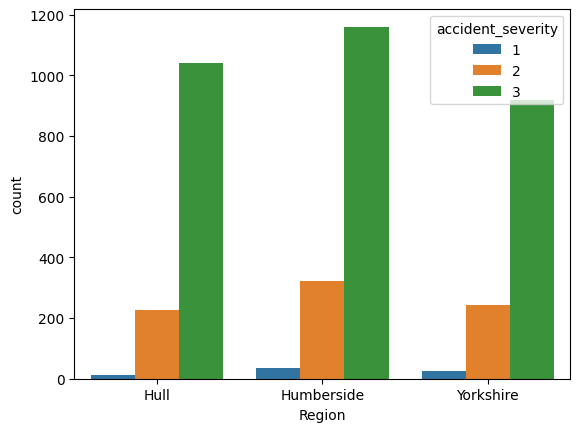

In [156]:
sns.countplot(data=df_new_merged, x="Region", hue="accident_severity")

In [157]:
df_new_merged.sample(5)

accident_index  accident_severity  longitude   latitude  speed_limit  \
84647  2020160936996                  3  -0.373628  53.754512           30   
86698  2020160976717                  1  -0.512634  53.740936           60   
87121  2020161007734                  3  -0.666108  53.865474           30   
84617  2020160987742                  3  -0.280539  53.769088           40   
85833  2020160934421                  3  -0.451139  53.643840           60   

       weather_conditions  junction_control  urban_or_rural_area  \
84647                   1                 4                    1   
86698                   1                -1                    2   
87121                   1                -1                    2   
84617                   1                 4                    1   
85833                   1                -1                    2   

       second_road_class  road_type  ...  engine_capacity_cc age_of_vehicle  \
84647                  6          6  ...                1598             14   
86698                  0          6  ...                2993              9   
87121                  0          6  ...                1798             10   
84617                  3          6  ...                1598              2   
85833                  0          6  ...                1598             11   

       objectid   lsoa01cd                       lsoa01nm  \
84647     12759  E01012759        Kingston upon Hull 025C   
86698     13092  E01013092  East Riding of Yorkshire 032F   
87121     13120  E01013120  East Riding of Yorkshire 015A   
84617     12827  E01012827        Kingston upon Hull 011D   
85833     13257  E01013257        North Lincolnshire 001D   

                           lsoa01nmw   shape__area  shape__length  \
84647        Kingston upon Hull 025C  3.981882e+05    3984.807880   
86698  East Riding of Yorkshire 032F  1.203971e+07   20541.799995   
87121  East Riding of Yorkshire 015A  1.563965e+07   29825.771396   
84617        Kingston upon Hull 011D  3.294704e+05    4517.538531   
85833        North Lincolnshire 001D  2.146841e+07   26396.131181   

                                   globalid      Region  
84647  f55da506-35c7-4db5-a007-bba4255d50e3        Hull  
86698  c6781a30-e17c-4d3e-94bb-a7877ef25ff4   Yorkshire  
87121  d56ffb0e-abf3-4ffe-b75f-e598a96ff18c   Yorkshire  
84617  1f8f0fb3-dbed-445e-b78b-b9cfce5dee96        Hull  
85833  2b7114e2-5ee0-4982-a8fd-2521d76ca84d  Humberside  

[5 rows x 30 columns]

## KMeans Clustering

##### Clustering the coordinates of the regions [Hull, Humeberside and East Riding

In [158]:
#latitude and longitude will be extracted from the new merged df for [humberside, Kingston Upon Hull and East Riding of Yorkshire]
region_df = df_new_merged[["longitude", "latitude"]]
region_df

longitude   latitude
83493  -0.393424  53.744936
83494  -0.393424  53.744936
83495  -0.400627  53.744520
83496  -0.400627  53.744520
83497  -0.400523  53.744482
...          ...        ...
87473  -0.408728  53.843568
87474  -0.408728  53.843568
87475  -0.408728  53.843568
87476  -0.428826  53.743858
87477  -0.428826  53.743858

[3985 rows x 2 columns]

### Check for outlier

**The latitude and longitude of Hull is 53.77700 and 0.335827, East Riding is 53.841 and 0.4344, humberside is 53 and 0.00**

In [159]:
region_df.loc[region_df['latitude'] > 55]

Empty DataFrame
Columns: [longitude, latitude]
Index: []

In [160]:
region_df.loc[region_df['longitude'] > 0.45]

Empty DataFrame
Columns: [longitude, latitude]
Index: []

**The three regions lie between 53 and 54 on the lat and 0 and 0.4 on the long, no outlier**

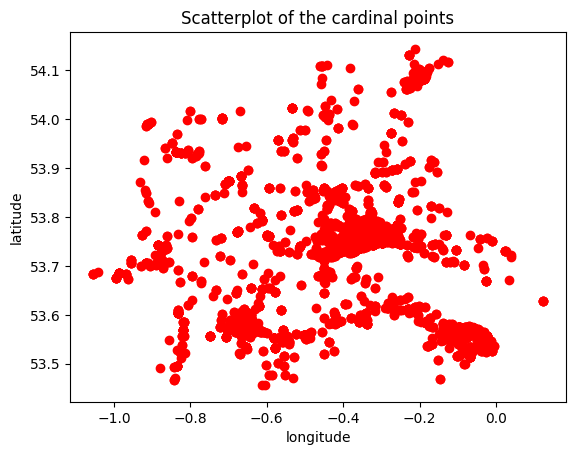

In [161]:
#scatter plot to view the data points of the accident
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Scatterplot of the cardinal points')
plt.scatter(region_df['longitude'],region_df['latitude'], color = 'red')
plt.show()


**Concentration can be noticed where latitude between 53.7 and 53.8 corresponds with longitude between -0.5 and -0.2;latitude between 53.5 and 53.6 corresponds with longitude between 0.0 and -0.2**

In [162]:
#save the figure
plt.savefig('fig1')

<Figure size 640x480 with 0 Axes>

### Plot elbow graph

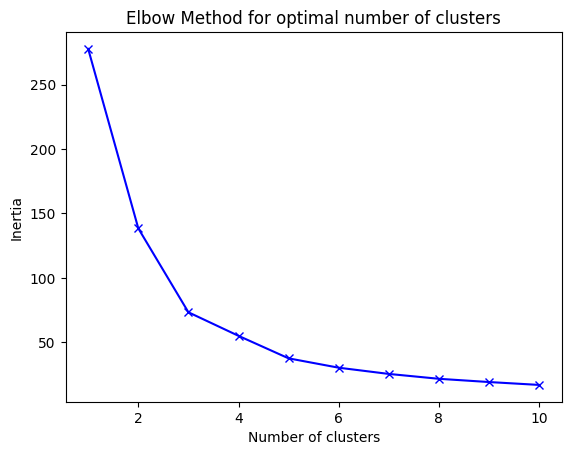

In [163]:
#create a init instance
inertia =[]
n_clusters = range(1,11)

for k in n_clusters:
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(region_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal number of clusters')
plt.show()

**The optimal number of cluster is 4**

In [164]:
import numpy as np

L1 = region_df['longitude']
L2 = region_df['latitude']

#change data into array
combined_card = np.column_stack((L1, L2))
combined_card

array([[-0.393424, 53.744936],
       [-0.393424, 53.744936],
       [-0.400627, 53.74452 ],
       ...,
       [-0.408728, 53.843568],
       [-0.428826, 53.743858],
       [-0.428826, 53.743858]])

In [165]:
#create ckmeans clusters
kmeans=KMeans(n_clusters=4)
kmeans.fit(region_df)

KMeans(n_clusters=4)

In [166]:
#readjust the positions of the centroids of the clusters
labels =kmeans.predict(region_df)

In [167]:
#print labels
labels

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
#find the clusters
centroids=kmeans.cluster_centers_

In [169]:
#print clusters
centroids

array([[-0.3528641 , 53.78984356],
       [-0.6424859 , 53.58335417],
       [-0.08972053, 53.57565039],
       [-0.81495043, 53.80843243]])

<function matplotlib.pyplot.show(close=None, block=None)>

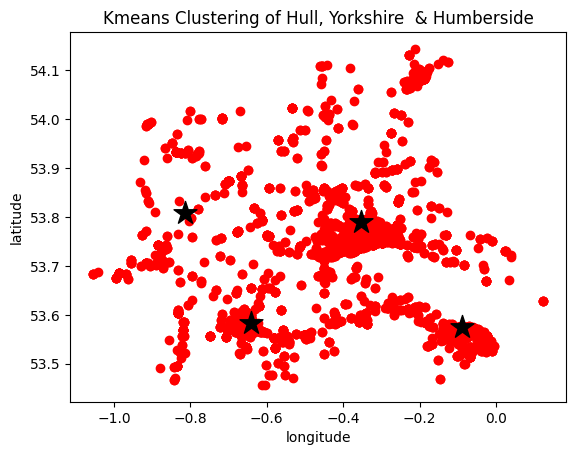

In [170]:
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Kmeans Clustering of Hull, Yorkshire  & Humberside')

plt.scatter(L1, L2, color = 'red')

plt.scatter(centroids[:,0], centroids[:,1], marker= '*', color= 'black', s = 300 )
           
plt.show

** Four clusters are shown on the plot as indicated by the black marker**

In [171]:
plt.savefig('fig2')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Clustered data')

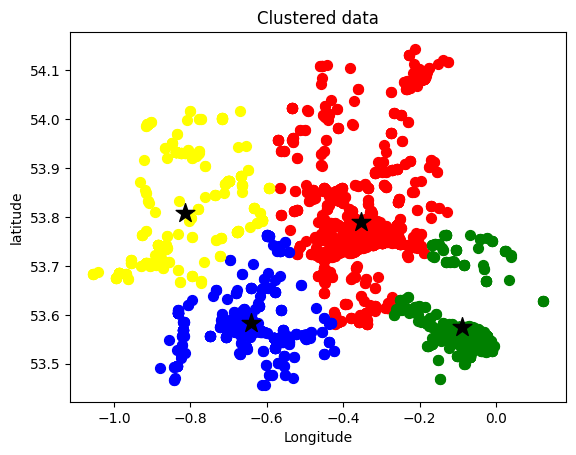

In [172]:
#plot data points of various clusters in different colors
plt.scatter(combined_card[labels==0,0], combined_card[labels==0,1], s=50, color='red')
plt.scatter(combined_card[labels==1,0], combined_card[labels==1,1], s=50, color='blue')
plt.scatter(combined_card[labels==2,0], combined_card[labels==2,1], s=50, color='green')
plt.scatter(combined_card[labels==3,0], combined_card[labels==3,1], s=50, color='yellow')

#plot the centroids of each cluster 
plt.scatter(centroids[0][0], centroids[0][1], marker= '*', s=200, color='black')
plt.scatter(centroids[1][0], centroids[1][1], marker= '*', s=200, color='black')
plt.scatter(centroids[2][0], centroids[2][1], marker= '*', s=200, color='black')
plt.scatter(centroids[3][0], centroids[3][1], marker= '*', s=200, color='black')

plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.title('Clustered data')

**the data points of the 4 clusters are distinguished by color**

In [173]:
iter=10
#performk means clsutering multiple times
for i in range(iter):
    #create a new KMeans instance
    kmeans=KMeans(n_clusters=4)
    #fit the model to the data
    kmeans.fit(combined_card)
    #get the cluster labels for each data point
    labels=kmeans.labels_
    #print the cluster labels
    print(f"Cluster labels: {labels}")

Cluster labels: [0 0 0 ... 0 0 0]
Cluster labels: [0 0 0 ... 0 0 0]
Cluster labels: [0 0 0 ... 0 0 0]
Cluster labels: [1 1 1 ... 1 1 1]
Cluster labels: [0 0 0 ... 0 0 0]
Cluster labels: [1 1 1 ... 1 1 1]
Cluster labels: [2 2 2 ... 2 2 2]
Cluster labels: [0 0 0 ... 0 0 0]
Cluster labels: [0 0 0 ... 0 0 0]
Cluster labels: [0 0 0 ... 0 0 0]


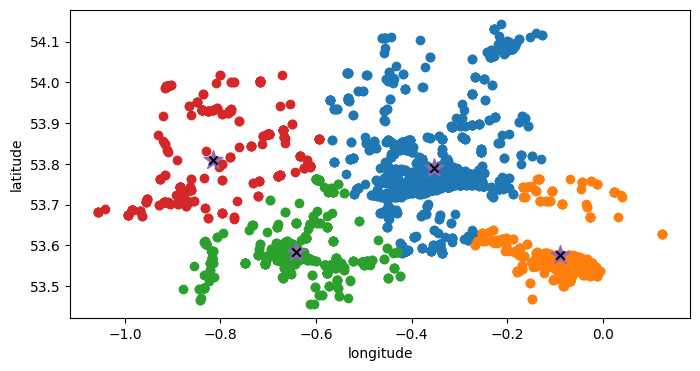

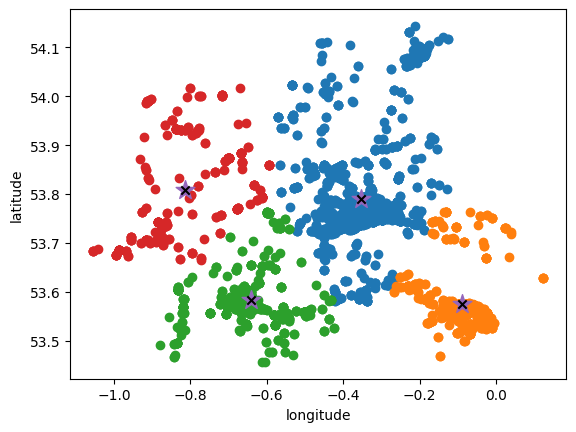

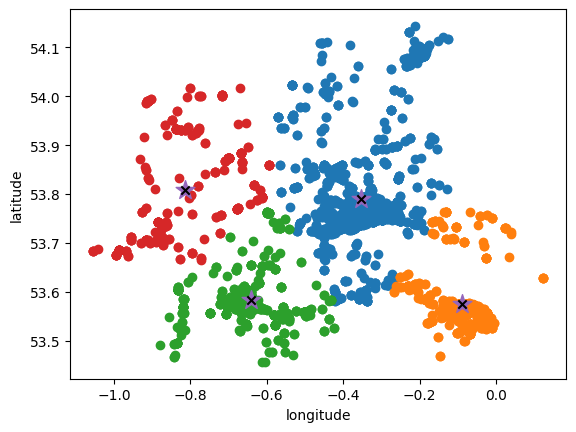

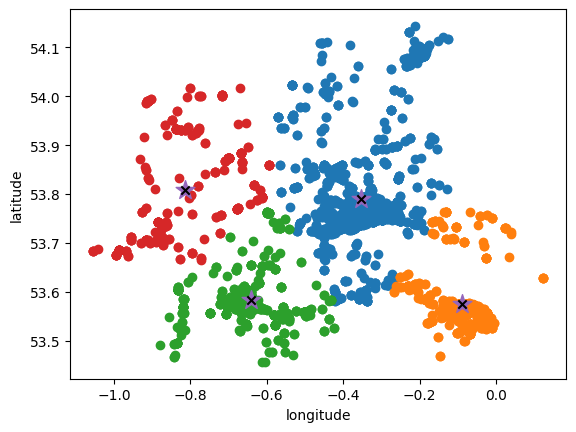

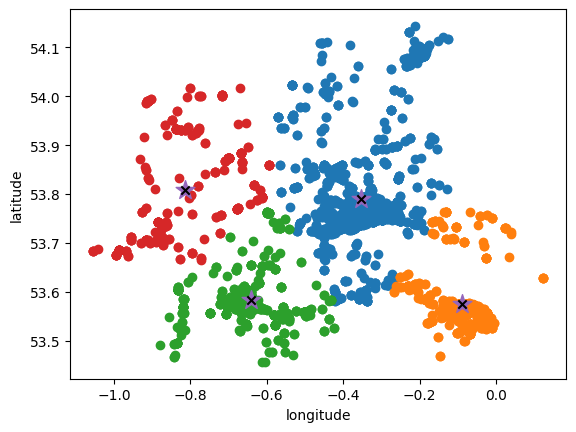

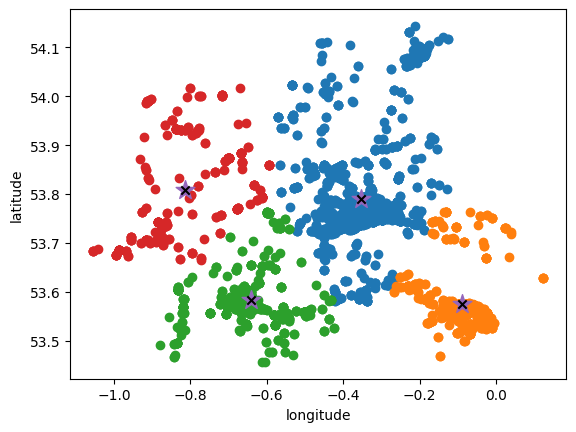

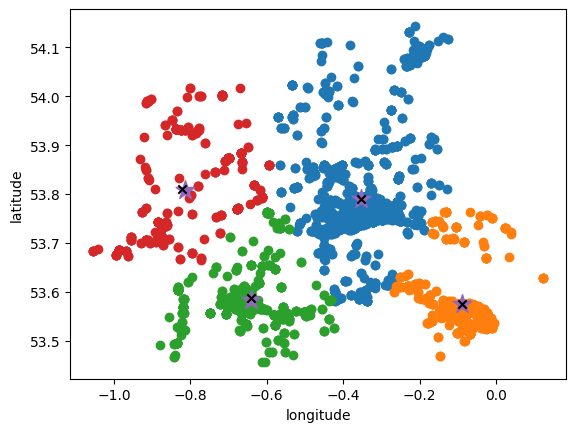

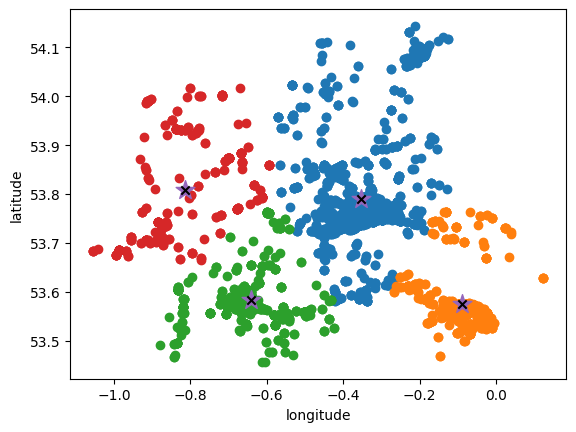

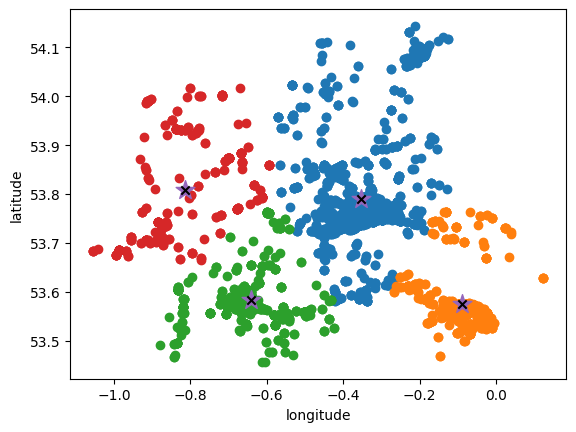

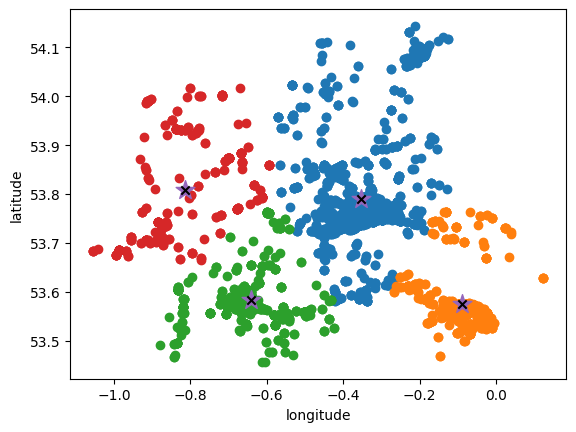

In [174]:
# number of iterration to run Kmeans to get a constant result

iter = 10

plt.figure(figsize=(8,4))

#init list to store the cluster centers for each iter
centers=[]

#loop to run KMeans multiple times
for i in range (iter):
    kmeans=KMeans(n_clusters=4)
    kmeans.fit(combined_card)
    centroids=kmeans.cluster_centers_
    centers.append(centroids)
    
#scatterplot for each run
for i, cluster_centers_ in enumerate(centers):
    labels=KMeans(n_clusters=4).fit_predict(combined_card)
    plt.scatter(combined_card[kmeans.labels_==0,0], combined_card[kmeans.labels_==0,1], label='cluster1')
    plt.scatter(combined_card[kmeans.labels_==1,0], combined_card[kmeans.labels_==1,1], label='cluster2')
    plt.scatter(combined_card[kmeans.labels_==2,0], combined_card[kmeans.labels_==2,1], label='cluster3')
    plt.scatter(combined_card[kmeans.labels_==3,0], combined_card[kmeans.labels_==3,1], label='cluster4')
    
    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, label='centroid')
    
    plt.scatter(cluster_centers_[:,0],cluster_centers_[:,1], marker= 'x', color='BLACK')
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.show()

**after ten iterrations, the centroids were stable**.

### Mapping data points to map

In [175]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
import folium

In [177]:
region_df

longitude   latitude
83493  -0.393424  53.744936
83494  -0.393424  53.744936
83495  -0.400627  53.744520
83496  -0.400627  53.744520
83497  -0.400523  53.744482
...          ...        ...
87473  -0.408728  53.843568
87474  -0.408728  53.843568
87475  -0.408728  53.843568
87476  -0.428826  53.743858
87477  -0.428826  53.743858

[3985 rows x 2 columns]

In [178]:
#assign values from labels to new column k in reg df
region_df['k'] = labels

C:\Users\707729\AppData\Local\Temp\ipykernel_19380\4256722461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['k'] = labels


In [179]:
region_df['k'].value_counts()

0    2171
1     782
2     680
3     352
Name: k, dtype: int64

In [180]:
#select columns lat and long with corresp k value and put in a list
cluster1  = region_df[['latitude', 'longitude']][region_df['k'] ==0].values.tolist()
cluster2  = region_df[['latitude', 'longitude']][region_df['k'] ==1].values.tolist()
cluster3  = region_df[['latitude', 'longitude']][region_df['k'] ==2].values.tolist()
cluster4  = region_df[['latitude', 'longitude']][region_df['k'] ==3].values.tolist()

In [181]:
#display map of corresponding to the card points 
map_center = [region_df['longitude'].mean(), region_df['latitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10, tiles  = "openstreetmap")
map

In [182]:
#iterate through each data point in the lists,and mark each data point on the map
for i in cluster1:
    folium.CircleMarker(i, radius=2, color='red', fill_color ='lightred').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2, color='blue', fill_color ='lightblue').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2, color='green', fill_color ='lightgreen').add_to(map)
    
for i in cluster4:
    folium.CircleMarker(i, radius=2, color='yellow', fill_color ='lightyellow').add_to(map)

In [183]:
map

**Noticeably, heavy cluster is found in Hull. For Humber, two regions, [Scunthorpe and Grimsby] located in North Lincolnshire and North East Lincolnshire (collapsed into Humberside) have clusters. This indicate that the a high rate of accidents in this area.**

**East Riding of York has sparsely dispersed datapoints which means fewer number of accidents in this region**

**reference: KMeans clustering in python for geospatial data** Youtube

# Exercise 6: Using outlier detection methods, identify unusual entries in your data set. 

### Insights to some outliers with focus on age of driver and vehicle data from the main database

### Eyeballing

**Some outliers were detected in the dataset during preprocessing and soem could be seen as negative one in the statistical summary of the dataset**

In [184]:
#road accident dataset df
merged_df2

accident_index  accident_severity  longitude   latitude  speed_limit  \
0       2020010219808                  3  -0.254001  51.462262           20   
1       2020010220496                  3  -0.139253  51.470327           20   
2       2020010220496                  3  -0.139253  51.470327           20   
3       2020010228005                  3  -0.178719  51.529614           30   
4       2020010228006                  2  -0.001683  51.541210           30   
...               ...                ...        ...        ...          ...   
220430  2020991030297                  2  -2.271903  57.186317           60   
220431  2020991030297                  2  -2.271903  57.186317           60   
220432  2020991030900                  3  -3.968753  55.950940           30   
220433  2020991030900                  3  -3.968753  55.950940           30   
220434  2020991032575                  3  -4.561040  56.003843           30   

        weather_conditions  junction_control  urban_or_rural_area  \
0                        9                -1                    1   
1                        1                 2                    1   
2                        1                 2                    1   
3                        1                 1                    1   
4                        1                -1                    1   
...                    ...               ...                  ...   
220430                   1                -1                    2   
220431                   1                -1                    2   
220432                   1                 4                    1   
220433                   1                 4                    1   
220434                   1                -1                    1   

        second_road_class  road_type  ...  light_conditions casualty_class  \
0                       0          6  ...                 1              3   
1                       6          6  ...                 1              3   
2                       6          6  ...                 1              3   
3                       6          6  ...                 4              3   
4                       0          6  ...                 4              3   
...                   ...        ...  ...               ...            ...   
220430                  6          6  ...                 1              1   
220431                  6          6  ...                 1              1   
220432                  6          6  ...                 1              1   
220433                  6          6  ...                 1              1   
220434                  0          6  ...                 1              3   

        sex_of_casualty  age_of_casualty  pedestrian_location  vehicle_type  \
0                     1               31                    9             9   
1                     2                2                    1             9   
2                     2                4                    1             9   
3                     1               23                    5             9   
4                     1               47                    4             8   
...                 ...              ...                  ...           ...   
220430                1               38                    0             9   
220431                1               38                    0             5   
220432                1               76                    0             9   
220433                1               76                    0             1   
220434                1               48                    9             9   

        sex_of_driver  age_of_driver  engine_capacity_cc  age_of_vehicle  
0                   2             32                1968               6  
1                   1             45                1395               2  
2                   1             45                1395               2  
3                   3             -1       

#### Visualising with Box plot 

<Axes: xlabel='age_of_driver'>

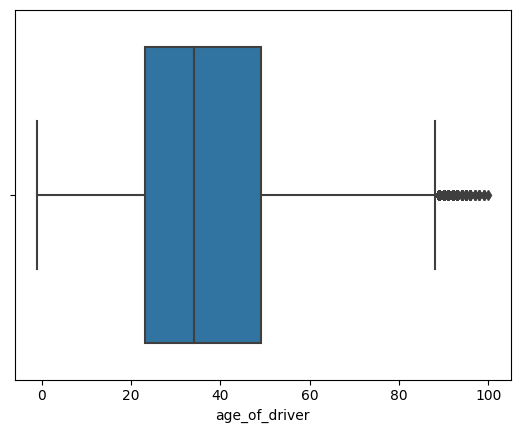

In [185]:
sns.boxplot(data = merged_df2, x = "age_of_driver")

<Axes: xlabel='age_of_vehicle'>

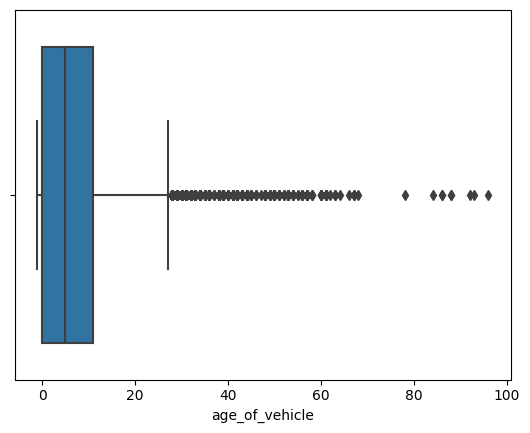

In [186]:
sns.boxplot(data =merged_df2, x = "age_of_vehicle")

#### Visualising with dist plot 

C:\Users\707729\AppData\Local\Temp\ipykernel_19380\1126883285.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df2["age_of_driver"])
C:\Users\707729\AppData\Local\Temp\ipykernel_19380\1126883285.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df2["age_of_vehicle"])


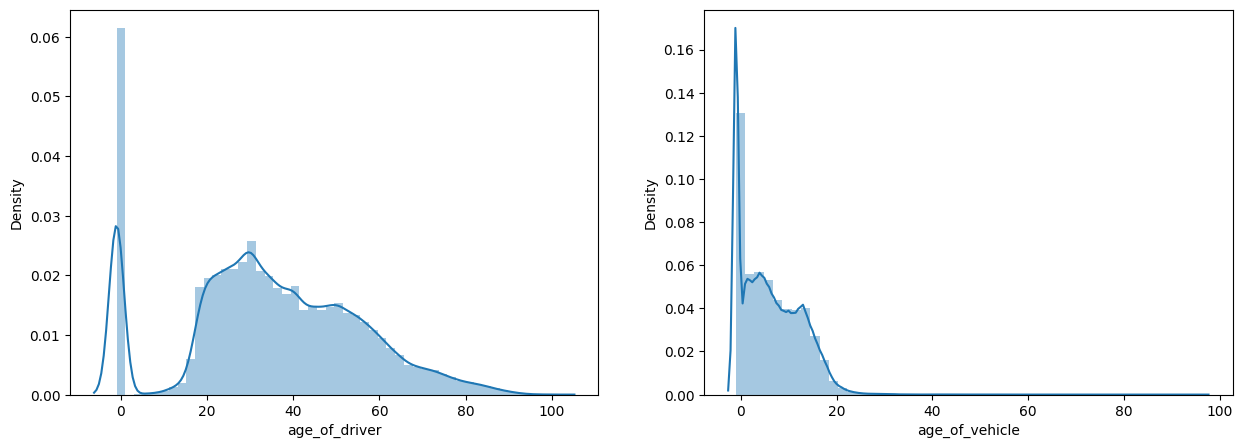

In [187]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(merged_df2["age_of_driver"])

plt.subplot(1,2,2)
sns.distplot(merged_df2["age_of_vehicle"])
plt.show()

In [188]:
merged_df2["age_of_vehicle"].skew()

0.8964666435167624

In [189]:
merged_df2["age_of_driver"].skew()

0.019067952317943834

## DBSCAN

In [190]:
from sklearn.cluster import DBSCAN

In [191]:
X = merged_df2[['age_of_driver','age_of_vehicle']].values

In [192]:
dbscan_opt = DBSCAN(eps = 3, min_samples = 10)
dbscan_opt.fit(X)
labels = dbscan_opt.labels_

In [193]:
pd.Series(labels).value_counts()

 0    192901
 1     27369
-1       148
 2        17
dtype: int64

**The -1 are the outliers**

Text(0.5, 1.0, 'DBSCAN with eps 3, sam   10')

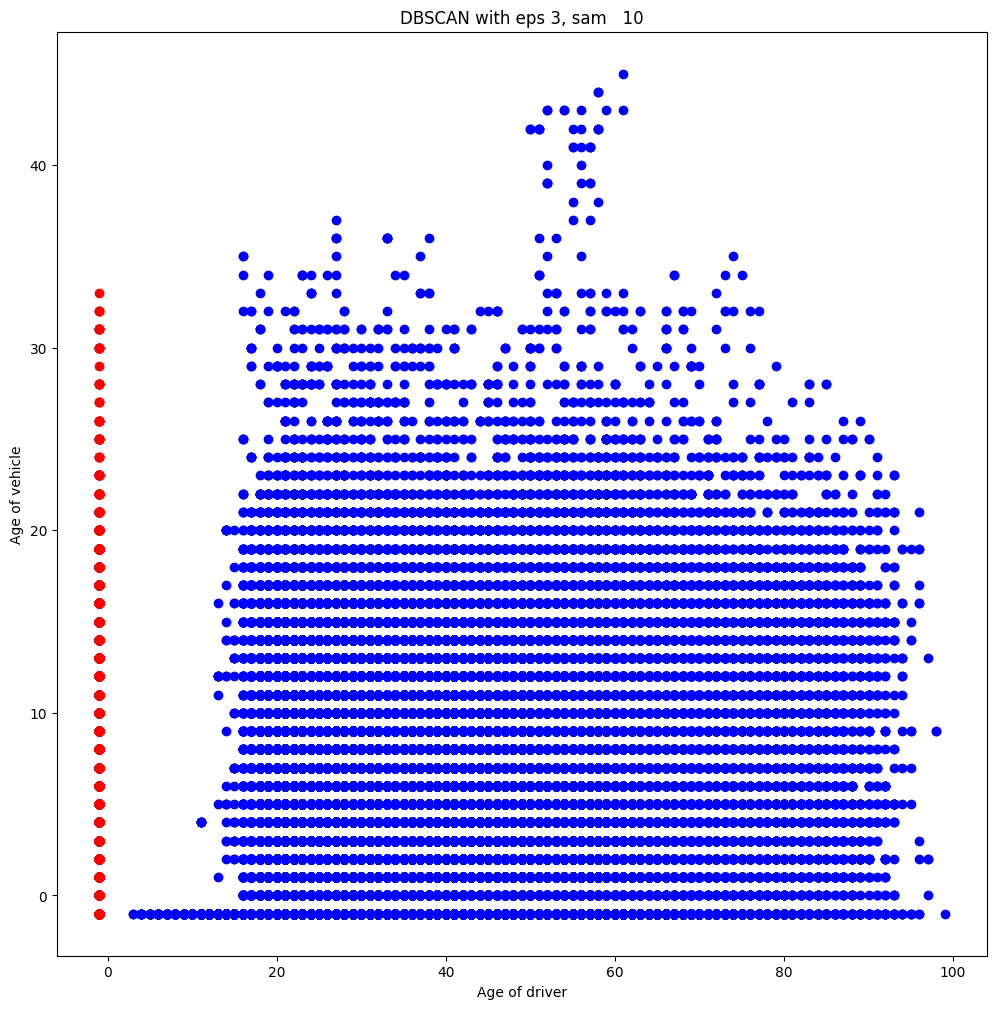

In [194]:
plt.figure(figsize=(12,12))

uniqlabels = set(labels)
colors = ['blue', 'red']

for color, label in zip(colors, uniqlabels):
    mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][mask], X[:,1][mask],'o', color=color);

plt.xlabel('Age of driver');
plt.ylabel('Age of vehicle');
plt.title("DBSCAN with eps 3, sam   10")

**Reference: Outlier detector techniques (Kaggle)**

## Z score

###### Age of driver

In [195]:
from scipy.stats import zscore

C:\Users\707729\AppData\Local\Temp\ipykernel_19380\3527428166.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df2["age_of_driver"])


<Axes: xlabel='age_of_driver', ylabel='Density'>

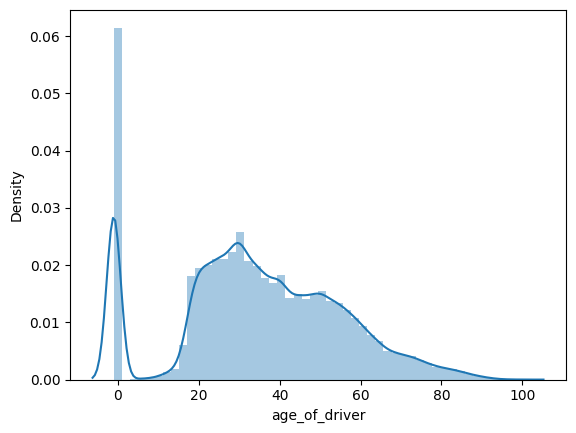

In [196]:
sns.distplot(merged_df2["age_of_driver"])

In [197]:
ageval = merged_df2["age_of_driver"]

In [198]:
outliers = []
zscore = []

def detect_outliers(ageval):
    
    #define a threshold
    threshold = 2
    
    mean = np.mean(ageval)
    std = np.std(ageval)
    
    for i in ageval:
        z_score = (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print(f"Total number of outlier",len(outliers))  

In [199]:
detect_outliers(merged_df2["age_of_driver"])

Total number of outlier 5156


Text(0.5, 1.0, 'Histogram of zscore of age of driver')

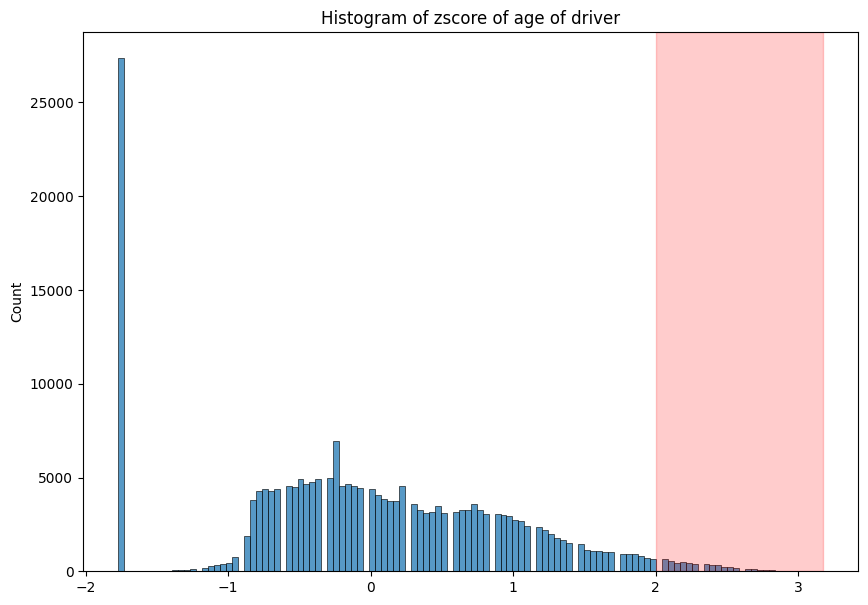

In [200]:
plt.figure(figsize = (10, 7))
sns.histplot(zscore)
plt.axvspan(xmin = 2, xmax = max(zscore), alpha  =0.2, color = 'red')
plt.title("Histogram of zscore of age of driver")

**Zscore finds a point between the mean and stdev, with threshold of 2, the red area is regarded as outlier**

###### Age of vehicle

In [201]:
ageveh = merged_df2["age_of_vehicle"]

In [202]:
outliers = []
zscore1 = []

def detect_outliers(ageveh):
    
    #define a threshold
    threshold = 2
    
    mean = np.mean(ageveh)
    std = np.std(ageveh)
    
    for i in ageveh:
        z_score = (i - mean)/std
        zscore1.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print(f"Total number of outlier",len(outliers)) 

In [203]:
outlier_pt = detect_outliers(ageveh)

Total number of outlier 5389


Text(0.5, 1.0, 'Histogram of zscore of age of vehicle')

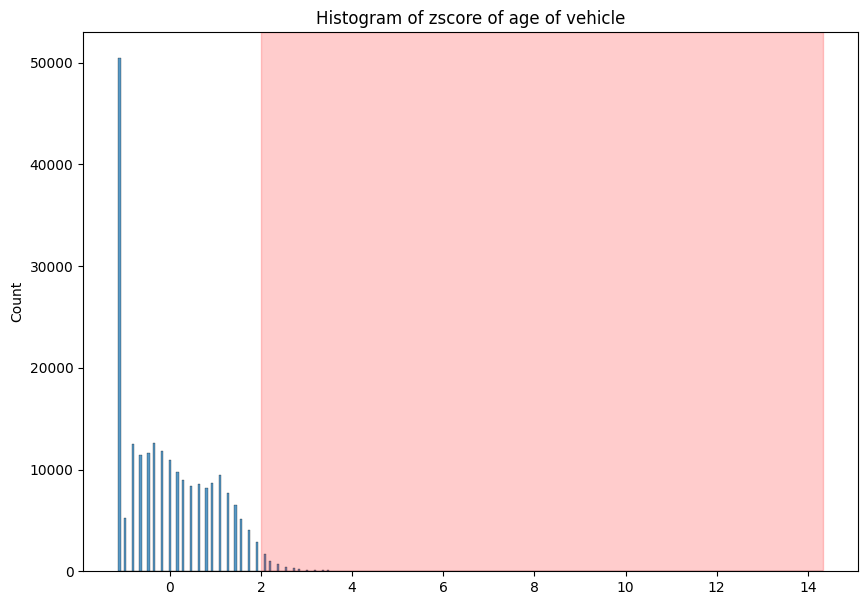

In [204]:
plt.figure(figsize = (10, 7))
sns.histplot(zscore1)
plt.axvspan(xmin = 2, xmax = max(zscore1), alpha  =0.2, color = 'red')
plt.title("Histogram of zscore of age of vehicle")

##  Multiple IQR test

##### Age of driver

In [207]:
age = merged_df2['age_of_driver']
age

0         32
1         45
2         45
3         -1
4         44
          ..
220430    57
220431    38
220432    68
220433    76
220434    39
Name: age_of_driver, Length: 220435, dtype: int64

In [208]:
q75 , q25 = np.percentile(age, [75, 25])

In [209]:
print(q75, q25)

49.0 23.0


In [210]:
iqr = q75 - q25
print(iqr)

26.0


In [211]:
# find the IQR
lowerval = q25 - (1.5*iqr)
upperval = q75 + (1.5*iqr) 

In [212]:
print(lowerval, upperval)

-16.0 88.0


In [213]:
age_outlier1 =  merged_df2[ merged_df2['age_of_driver'] > upperval]

In [214]:
age_outlier2 =  merged_df2[merged_df2['age_of_driver'] < lowerval]

In [215]:
age_outlier1.shape[0]

502

In [216]:
age_outlier2.shape[0]

0

In [217]:
age.unique

<bound method Series.unique of 0         32
1         45
2         45
3         -1
4         44
          ..
220430    57
220431    38
220432    68
220433    76
220434    39
Name: age_of_driver, Length: 220435, dtype: int64>

**Total outlier detected by IQR is 502**

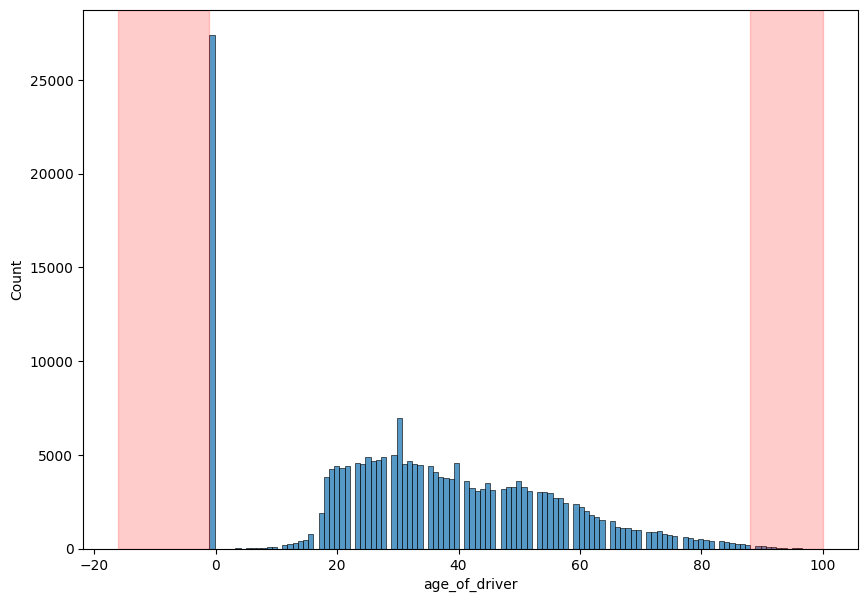

In [218]:
plt.figure(figsize = (10, 7))
sns.histplot(merged_df2['age_of_driver'], kde = False)
plt.axvspan(xmin = lowerval, xmax = merged_df2['age_of_driver'].min(), alpha = 0.2, color = 'red') 
plt.axvspan(xmin = upperval, xmax = merged_df2['age_of_driver'].max(), alpha  =0.2, color = 'red')

**the red area shows the outlier zone**

##### Outliers

In [219]:
 merged_df2[(merged_df2["age_of_driver"] > upperval) | (merged_df2["age_of_driver"] < lowerval)]

accident_index  accident_severity  longitude   latitude  speed_limit  \
2173    2020010231441                  3  -0.008491  51.640225           30   
2479    2020010231896                  3  -0.080577  51.653990           30   
2938    2020010232619                  3  -0.055492  51.346691           30   
2940    2020010232619                  3  -0.055492  51.346691           30   
3149    2020010232979                  2  -0.067755  51.599248           20   
...               ...                ...        ...        ...          ...   
216646  2020990972908                  2  -3.852813  57.171010           60   
217351  2020990978759                  3  -3.055045  55.939187           30   
218550  2020990991630                  2  -4.217918  55.827768           30   
219663  2020991004453                  2  -2.169783  57.155128           30   
219673  2020991004522                  2  -2.688371  55.598962           60   

        weather_conditions  junction_control  urban_or_rural_area  \
2173                     9                 4                    1   
2479                     1                 4                    1   
2938                     1                -1                    1   
2940                     1                -1                    1   
3149                     2                 4                    1   
...                    ...               ...                  ...   
216646                   1                 4                    2   
217351                   1                -1                    1   
218550                   2                -1                    1   
219663                   8                 4                    1   
219673                   1                 4                    2   

        second_road_class  road_type  ...  light_conditions casualty_class  \
2173                    6          6  ...                 1              1   
2479                    6          6  ...                 4              3   
2938                    0          6  ...                 1              1   
2940                    0          6  ...                 1              2   
3149                    3          6  ...                 4              3   
...                   ...        ...  ...               ...            ...   
216646                  3          6  ...                 1              2   
217351                  0          9  ...                 1              3   
218550                  0          6  ...                 1              3   
219663                  6          6  ...                 1              3   
219673                  4          6  ...                 1              1   

        sex_of_casualty  age_of_casualty  pedestrian_location  vehicle_type  \
2173                  2               33                    0             9   
2479                  2               32                    1             9   
2938                  1               90                    0             9   
2940                  2               86                    0             9   
3149                  2               52                    5             9   
...                 ...              ...                  ...           ...   
216646                2               94                    0             9   
217351                1               49                    1             9   
218550                1               22                   10            19   
219663                2               91                    4             9   
219673                2               89                    0             9   

        sex_of_driver  age_of_driver  engine_capacity_cc  age_of_vehicle  
2173                1             90                1388               9  
2479                1             91                1596              17  
2938                1             90                1998              19  
2940                1             90       

##### Age of vehicle

In [220]:
veh =  merged_df2['age_of_vehicle']

In [221]:
q75 , q25 = np.percentile(veh, [75, 25])

In [222]:
print(q75, q25)

11.0 0.0


In [223]:
iqr = q75 - q25
print(iqr)

11.0


In [224]:
# find the IQR
lowerval1 = q25 - (1.5*iqr)
upperval1 = q75 + (1.5*iqr) 

In [225]:
print(lowerval1, upperval1)

-16.5 27.5


In [226]:
veh_outlier1 =  merged_df2[merged_df2['age_of_vehicle'] > upperval1]

In [227]:
veh_outlier2 =  merged_df2[merged_df2['age_of_vehicle'] < lowerval1]

In [228]:
veh_outlier1.shape[0]

555

In [229]:
veh_outlier2.shape[0]

0

**555 outliers are detected by IQR**

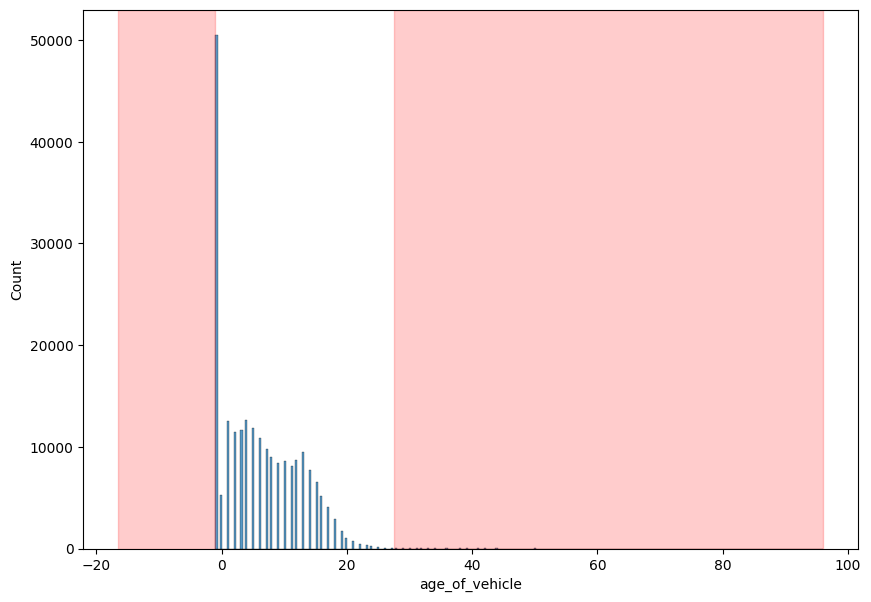

In [230]:
plt.figure(figsize = (10, 7))
sns.histplot(merged_df2['age_of_vehicle'], kde = False)
plt.axvspan(xmin = lowerval1, xmax = merged_df2['age_of_vehicle'].min(), alpha = 0.2, color = 'red') 
plt.axvspan(xmin = upperval1, xmax = merged_df2['age_of_vehicle'].max(), alpha  =0.2, color = 'red')

**the red zone shows the outlier zone**

##### Outliers

In [231]:
merged_df2[(merged_df2["age_of_vehicle"] > upperval1) | (merged_df2["age_of_vehicle"] < lowerval1)]

accident_index  accident_severity  longitude   latitude  speed_limit  \
855     2020010229391                  3  -0.204140  51.531004           20   
997     2020010229602                  3  -0.329872  51.445184           30   
1047    2020010229701                  3  -0.060001  51.649668           40   
2199    2020010231465                  3  -0.409902  51.457474           30   
4158    2020010234271                  3  -0.197385  51.538850           20   
...               ...                ...        ...        ...          ...   
218319  2020990989069                  2  -4.610940  55.499791           30   
218614  2020990992686                  3  -5.645577  55.677800           60   
218825  2020990994835                  3  -3.194996  55.938637           20   
219502  2020991002465                  3  -3.835880  55.599073           70   
219504  2020991002465                  3  -3.835880  55.599073           70   

        weather_conditions  junction_control  urban_or_rural_area  \
855                      1                 4                    1   
997                      1                 2                    1   
1047                     8                 2                    1   
2199                     1                 2                    1   
4158                     1                -1                    1   
...                    ...               ...                  ...   
218319                   2                -1                    1   
218614                   1                -1                    2   
218825                   1                 4                    1   
219502                   2                -1                    2   
219504                   2                -1                    2   

        second_road_class  road_type  ...  light_conditions casualty_class  \
855                     6          6  ...                 1              1   
997                     3          2  ...                 1              1   
1047                    3          3  ...                 1              1   
2199                    3          6  ...                 7              1   
4158                    0          6  ...                 1              1   
...                   ...        ...  ...               ...            ...   
218319                  0          6  ...                 4              1   
218614                  0          6  ...                 1              1   
218825                  6          6  ...                 1              1   
219502                  0          3  ...                 4              1   
219504                  0          3  ...                 4              2   

        sex_of_casualty  age_of_casualty  pedestrian_location  vehicle_type  \
855                   1               64                    0             9   
997                   1               40                    0             9   
1047                  1               45                    0             9   
2199                  1               27                    0            90   
4158                  1               33                    0             9   
...                 ...              ...                  ...           ...   
218319                2               43                    0             2   
218614                1               25                    0            17   
218825                1               55                    0             9   
219502                1               42                    0            90   
219504                1               21                    0            90   

        sex_of_driver  age_of_driver  engine_capacity_cc  age_of_vehicle  
855                 1             64                2962              28  
997                 3             -1                1360              28  
1047                1             45                1108              32  
2199                1             -1       

## Local Outlier Factor

In [232]:
from numpy import quantile, where
from sklearn.neighbors import LocalOutlierFactor

In [233]:
X = merged_df2[['age_of_driver', 'age_of_vehicle']]

In [234]:
model = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
y_pred = model.fit_predict(X) # to predict outliers
LOF_scores = model.negative_outlier_factor_
LOF_pred = pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies = merged_df2[LOF_pred == 1]

In [235]:
LOF_anomalies 

accident_index  accident_severity  longitude   latitude  speed_limit  \
37      2020010228038                  1   0.207510  51.593297           50   
45      2020010228060                  3  -0.308476  51.549775           30   
119     2020010228248                  2  -0.413752  51.446457           20   
129     2020010228264                  3  -0.072918  51.567320           20   
136     2020010228276                  3   0.144555  51.572018           30   
...               ...                ...        ...        ...          ...   
219936  2020991007708                  2  -4.854078  55.757859           30   
219998  2020991008391                  2  -4.644525  55.908620           60   
220007  2020991008446                  3  -4.303657  55.821229           30   
220015  2020991008521                  3  -4.639130  55.627741           30   
220243  2020991010673                  3  -3.312946  55.961668           40   

        weather_conditions  junction_control  urban_or_rural_area  \
37                       7                -1                    2   
45                       1                 4                    1   
119                      1                -1                    1   
129                      1                 4                    1   
136                      1                -1                    1   
...                    ...               ...                  ...   
219936                   2                -1                    2   
219998                   2                -1                    2   
220007                   1                -1                    1   
220015                   1                 4                    1   
220243                   9                 4                    1   

        second_road_class  road_type  ...  light_conditions casualty_class  \
37                      0          3  ...                 4              1   
45                      6          6  ...                 1              2   
119                     0          3  ...                 1              1   
129                     6          6  ...                 1              1   
136                     0          6  ...                 4              1   
...                   ...        ...  ...               ...            ...   
219936                  0          6  ...                 1              1   
219998                  0          6  ...                 6              3   
220007                  4          1  ...                 4              1   
220015                  6          6  ...                 1              1   
220243                  6          3  ...                 1              1   

        sex_of_casualty  age_of_casualty  pedestrian_location  vehicle_type  \
37                    1               29                    0             9   
45                    2               80                    0             9   
119                   1               59                    0            19   
129                   1               26                    0             9   
136                   1               88                    0             9   
...                 ...              ...                  ...           ...   
219936                1               80                    0             9   
219998                1               46                    8             9   
220007                1               51                    0             9   
220015                1               25                    0             9   
220243                2               73                    0             9   

        sex_of_driver  age_of_driver  engine_capacity_cc  age_of_vehicle  
37                  1             29                1840              20  
45                  2             77                 998              13  
119                 1             59                2295              19  
129                 1             41       

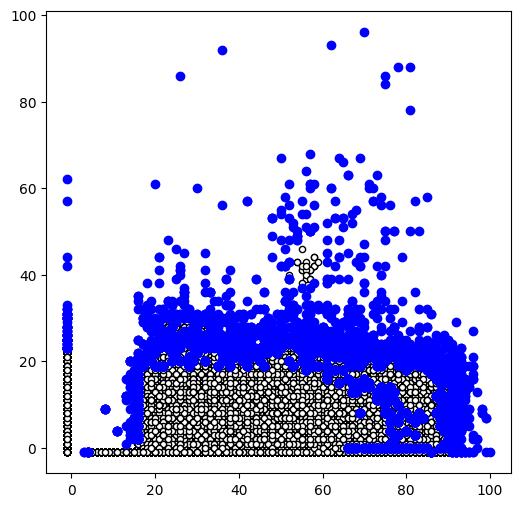

In [236]:
plt.figure(figsize=(6, 6))
plt.scatter(merged_df2['age_of_driver'], merged_df2['age_of_vehicle'], c = 'white', s = 20, edgecolor = 'k')
plt.scatter(LOF_anomalies['age_of_driver'], LOF_anomalies['age_of_vehicle'], c = 'blue')

### Chauvenet's criterion

In [237]:
from scipy.special import erfc

In [238]:
age=np.array([df_new_merged['age_of_driver']])

In [239]:
N = len(age)

In [240]:
mean=np.mean(age)
stdv=np.std(age)

In [241]:
d=abs(age-mean)/stdv

In [242]:
print(d)

[[0.45150638 0.65027379 0.00756869 ... 1.59919405 1.09421148 1.59919405]]


In [243]:
#normalise
d = d/ (2.0 **0.5)

In [244]:
probs = erfc (d)

In [245]:
probs

array([[0.65162463, 0.51551539, 0.99396112, ..., 0.10977749, 0.27386224,
        0.10977749]])

In [246]:
print(1/(4*N))

0.25


### Grubb's test

###  Age of driver

In [247]:
import scipy.stats as stats

In [248]:
age1=np.array(merged_df2['age_of_driver'])
age1

array([32, 45, 45, ..., 68, 76, 39], dtype=int64)

In [249]:
#compute the mean
avg=np.mean(age1)
avg

35.15660398757003

In [250]:
#computer the abs values
absvalues=abs(age1-avg)
absvalues

array([ 3.15660399,  9.84339601,  9.84339601, ..., 32.84339601,
       40.84339601,  3.84339601])

In [251]:
#obtain the nmax values
maxvalue=max(absvalues)
maxvalue

64.84339601242996

In [252]:
#get G vamues from 
stdev = np.std(age1)

In [253]:
Grubbs = maxvalue/stdev
print(Grubbs)

3.174198055899282


In [254]:
#compute the critical value
def get_critical_G(size, alpha):
    
    tdist =stats.t.ppf(1-alpha/(2 * size), size - 2)
    
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
       
    critical_value = numerator/denominator
        
    print("Grubbs Critical Value:",(critical_value))
    return critical_value

In [255]:
#determine critical parameter
Gcritical = get_critical_G(len(age1), 0.05)

Grubbs Critical Value: 5.175740951909147


In [256]:
print(Grubbs)

3.174198055899282


### Age of vehicle

In [257]:
veh1=np.array(merged_df2['age_of_vehicle'])
veh1

array([ 6,  2,  2, ...,  1, -1,  2], dtype=int64)

In [258]:
#compute the mean
avg=np.mean(veh1)
avg

6.0924853131308545

In [259]:
#computer the abs values
absvalues=abs(veh1-avg)
absvalues

array([0.09248531, 4.09248531, 4.09248531, ..., 5.09248531, 7.09248531,
       4.09248531])

In [260]:
#obtain the nmax values
maxvalue=max(absvalues)
maxvalue

89.90751468686915

In [261]:
#get G vamues from 
stdev = np.std(veh1)

In [262]:
Grubbs = maxvalue/stdev
print(Grubbs)

14.332171705050472


In [263]:
#compute the critical value
def get_critical_G(size, alpha):
    
    tdist =stats.t.ppf(1-alpha/(2 * size), size - 2)
    
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
       
    critical_value = numerator/denominator
        
    print("Grubbs Critical Value:",(critical_value))
    return critical_value

In [264]:
#determine critical parameter
Gcritical = get_critical_G(len(veh1), 0.05)

Grubbs Critical Value: 5.175740951909147


In [265]:
print(Grubbs)

14.332171705050472


## Exercise 7: Develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

#### Feature selection

###### Few relevant features will be considered as predictors for machine learning algorithm

In [267]:
merged_df2.describe()

accident_severity      longitude       latitude    speed_limit  \
count      220435.000000  220435.000000  220435.000000  220435.000000   
mean            2.758251      -1.204213      52.364814      37.866401   
std             0.470845       1.367758       1.319498      14.613512   
min             1.000000      -7.497375      49.970479      20.000000   
25%             3.000000      -2.120397      51.457792      30.000000   
50%             3.000000      -1.095149      51.850675      30.000000   
75%             3.000000      -0.127165      53.330744      50.000000   
max             3.000000       1.756257      60.541144      70.000000   

       weather_conditions  junction_control  urban_or_rural_area  \
count       220435.000000     220435.000000        220435.000000   
mean             1.660217          1.692109             1.357520   
std              1.770226          2.479581             0.479593   
min              1.000000         -1.000000             1.000000   
25%              1.000000         -1.000000             1.000000   
50%              1.000000          2.000000             1.000000   
75%              1.000000          4.000000             2.000000   
max              9.000000          9.000000             3.000000   

       second_road_class      road_type   police_force  light_conditions  \
count      220435.000000  220435.000000  220435.000000     220435.000000   
mean            3.019171       5.209599      27.989779          2.047261   
std             2.750966       1.665439      24.182384          1.731055   
min            -1.000000       1.000000       1.000000          1.000000   
25%             0.000000       6.000000       5.000000          1.000000   
50%             3.000000       6.000000      23.000000          1.000000   
75%             6.000000       6.000000      45.000000          4.000000   
max             6.000000       9.000000      99.000000          7.000000   

       casualty_class  sex_of_casualty  age_of_casualty  pedestrian_location  \
count   220435.000000    220435.000000    220435.000000        220435.000000   
mean         1.340304         1.368304        36.789725             0.406088   
std          0.608077         0.484710        18.623187             1.623865   
min          1.000000         1.000000        -1.000000             0.000000   
25%          1.000000         1.000000        23.000000             0.000000   
50%          1.000000         1.000000        34.000000             0.000000   
75%          2.000000         2.000000        50.000000             0.000000   
max          3.000000         9.000000        99.000000            10.000000   

        vehicle_type  sex_of_driver  age_of_driver  engine_capacity_cc  \
count  220435.000000  220435.000000  220435.000000       220435.000000   
mean       10.188622       1.463152      35.156604         1407.144061   
std        11.179084       0.671889      20.428323         1542.884192   
min         1.000000       1.000000      -1.000000           -1.000000   
25%         9.000000       1.000000      23.000000          125.000000   
50%         9.000000       1.000000      34.000000         1398.000000   
75%         9.000000       2.000000      49.000000         1968.000000   
max        98.000000       3.000000     100.000000        17696.000000   

       age_of_vehicle  
count   220435.000000  
mean         6.092485  
std          6.273140  
min         -1.000000  
25%          0.000000  
50%          5.000000  
75%         11.000000  
max         96.000000

In [269]:
columns_to_drop = ['accident_index','longitude', 'latitude', 'junction_control', 'urban_or_rural_area','lsoa_of_accident_location','second_road_class','police_force', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'pedestrian_location', 'vehicle_type', 'engine_capacity_cc']
accident_2020 = merged_df2.drop(columns = columns_to_drop, axis = 1)

In [270]:
accident_2020

accident_severity  speed_limit  weather_conditions  road_type  \
0                       3           20                   9          6   
1                       3           20                   1          6   
2                       3           20                   1          6   
3                       3           30                   1          6   
4                       2           30                   1          6   
...                   ...          ...                 ...        ...   
220430                  2           60                   1          6   
220431                  2           60                   1          6   
220432                  3           30                   1          6   
220433                  3           30                   1          6   
220434                  3           30                   1          6   

        light_conditions  sex_of_driver  age_of_driver  age_of_vehicle  
0                      1              2             32               6  
1                      1              1             45               2  
2                      1              1             45               2  
3                      4              3             -1              -1  
4                      4              1             44               8  
...                  ...            ...            ...             ...  
220430                 1              1             57               2  
220431                 1              1             38               2  
220432                 1              2             68               1  
220433                 1              1             76              -1  
220434                 1              1             39               2  

[220435 rows x 8 columns]

In [271]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [272]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [273]:
y_labels=pd.Series(accident_2020['accident_severity'] ==1)
y_labels

0         False
1         False
2         False
3         False
4         False
          ...  
220430    False
220431    False
220432    False
220433    False
220434    False
Name: accident_severity, Length: 220435, dtype: bool

In [274]:
y_labels.value_counts()

False    216204
True       4231
Name: accident_severity, dtype: int64

there are 21204 non fatal accident compared to 4231 fatal accidents

In [275]:
y_label = accident_2020['accident_severity'] ==1
y_label

0         False
1         False
2         False
3         False
4         False
          ...  
220430    False
220431    False
220432    False
220433    False
220434    False
Name: accident_severity, Length: 220435, dtype: bool

##### Using SMOTE to adjust imbalanced dataset

In [276]:
from imblearn.under_sampling import RandomUnderSampler

In [277]:
df_acc_balanced, y_balanced = RandomUnderSampler().fit_resample(accident_2020, y_label)

In [278]:
 y_balanced

111278    False
18947     False
167764    False
159050    False
162287    False
          ...  
220140     True
220162     True
220163     True
220211     True
220212     True
Name: accident_severity, Length: 8462, dtype: bool

In [279]:
 y_balanced.value_counts()

False    4231
True     4231
Name: accident_severity, dtype: int64

#### Feature Selection Using Filtering

In [280]:
column_to_remove = 'accident_severity'
df_acc_balanced = df_acc_balanced.drop(column_to_remove, axis =1)

In [281]:
from sklearn.feature_selection import SelectKBest, f_classif

In [282]:
selector = SelectKBest(f_classif, k = 7)
selector.fit(df_acc_balanced, y_balanced)

SelectKBest(k=7)

#### Get the names and scores of the features it selected.

In [283]:
mask = selector.get_support()

In [284]:
names = selector.feature_names_in_[mask]

In [285]:
scores = selector.scores_[mask]

#### plot a bar chart of the features and the scores

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'speed_limit'),
  Text(1, 0, 'weather_conditions'),
  Text(2, 0, 'road_type'),
  Text(3, 0, 'light_conditions'),
  Text(4, 0, 'sex_of_driver'),
  Text(5, 0, 'age_of_driver'),
  Text(6, 0, 'age_of_vehicle')])

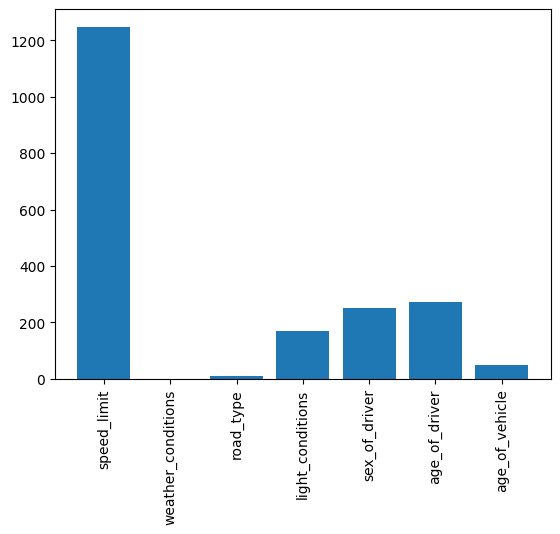

In [286]:
plt.bar(names, scores)
plt.xticks(rotation = "vertical")

#### Random Forest

In [288]:
X = df_acc_balanced[['speed_limit', 'road_type', 'light_conditions', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle']]
y = y_balanced

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [290]:
random_forest = RandomForestClassifier(n_estimators= 200)
random_forest.fit(X_train, y_train)
Y_pred =random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1= round(random_forest.score(X_test, y_test) * 100, 2)


sk_report =classification_report(
    digits = 6,
    y_true =y_test,
    y_pred= Y_pred)

print("Accuracy", acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred)

Accuracy 74.6
              precision    recall  f1-score   support

       False   0.760870  0.710024  0.734568       838
        True   0.733260  0.781287  0.756512       855

    accuracy                       0.746013      1693
   macro avg   0.747065  0.745655  0.745540      1693
weighted avg   0.746926  0.746013  0.745650      1693



col_0              False  True 
accident_severity              
False                595    243
True                 187    668

#### XGBoost

In [293]:
import xgboost as xgb

In [294]:
from sklearn.model_selection import train_test_split

In [312]:
X = df_acc_balanced[['speed_limit', 'road_type', 'light_conditions', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle']]
y  = y_balanced

In [313]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [314]:
#train XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [316]:
#predict on test data
y_pred = model.predict(X_test)

In [318]:
#evaluate model performance
accuracy = accuracy_score(y_test, y_pred1)

In [319]:
print(f"Accuracy: {accuracy: 2f}")

Accuracy:  0.733018


In [320]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.73      0.73      0.73       838
        True       0.74      0.73      0.74       855

    accuracy                           0.73      1693
   macro avg       0.73      0.73      0.73      1693
weighted avg       0.73      0.73      0.73      1693



In [321]:
pd.crosstab(y_test, Y_pred)

col_0              False  True 
accident_severity              
False                595    243
True                 187    668

#### Logistic Regression

In [324]:
lr= LogisticRegression()

In [325]:
X = df_acc_balanced[['speed_limit', 'road_type', 'light_conditions', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle']]
y  = y_balanced

In [326]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [327]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [338]:
report =classification_report(
    digits = 6,
    y_true =y_test,
    y_pred = Y_pred)

print("Accuracy", round(accuracy_score(y_pred, y_test)))
print(report)
confusion_matrix= pd.crosstab(y_test, Y_pred)
print(confusion_matrix)

Accuracy 1
              precision    recall  f1-score   support

       False   0.760870  0.710024  0.734568       838
        True   0.733260  0.781287  0.756512       855

    accuracy                       0.746013      1693
   macro avg   0.747065  0.745655  0.745540      1693
weighted avg   0.746926  0.746013  0.745650      1693

col_0              False  True 
accident_severity              
False                595    243
True                 187    668


### Decision Tree

In [329]:
from sklearn.model_selection import train_test_split

In [335]:
from sklearn.model_selection import cross_validate

In [330]:
X = df_acc_balanced[['speed_limit', 'road_type', 'light_conditions', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle']]
y  = y_balanced

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [332]:
tree = DecisionTreeClassifier(min_samples_leaf =100)

In [333]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [336]:
results_tree = cross_validate(tree, X_train, y_train, cv = 10,
                             scoring = "accuracy", return_estimator = True)

In [337]:
results_tree 

{'fit_time': array([0.0080092 , 0.00698233, 0.00698256, 0.0069859 , 0.00697947,
        0.00708938, 0.00899315, 0.00714421, 0.00797844, 0.00698113]),
 'score_time': array([0.00199151, 0.00199437, 0.00199437, 0.00199533, 0.00199437,
        0.        , 0.00303006, 0.00199533, 0.00199366, 0.00199485]),
 'estimator': [DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100)],
 'test_score': array([0.67208272, 0.66174298, 0.69128508, 0.67799114, 0.71048744,
        0.67208272, 0.67208272, 0.65288035, 0.65435746, 0.7056213 ])}